# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [2]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
# Cell type : CodeWrite

def decision(prior, cov, mu, X_test):
    """ Gives the posterior probability (unscaled) of the given data instance 
    belonging to a particular class whose prior is known/estimated

    Arguments:
    prior: prior probability of the class under examination
    cov: covairance of the class/dataset under examination
    mu: ML estimate for the mean of the class under examination
    X_test: numpy array of shape (m,d)

    Returns:
    probab: the unscaled posterior probability of a data point belonging to the 
            class under examination     
    """
    det_cov = np.linalg.det(cov)
    central_term = (X_test -  mu)
    cov_inv = np.linalg.inv(cov)
    exp_term = (-0.5)*(((central_term@cov_inv)*central_term).sum(axis=0))
    probab = (prior*np.exp(exp_term))/(det_cov**0.5)
    return probab

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    y_plus = Y_train[Y_train == 1]
    
    prior_plus = len(y_plus)/len(Y_train)
    prior_minus = 1 - prior_plus

    x_plus = X_train[Y_train == 1, :]
    x_minus = X_train[Y_train ==  -1, :]

    mu_plus = np.mean(x_plus, axis = 0)
    mu_minus = np.mean(x_minus, axis = 0)

    r, c = X_test.shape

    # the covariance for this case is given: teh identity matrix!
    cov = np.identity(c, dtype =  float)
    
    Y_test_pred = []
    
    # for each data point, we check whether its probability of belonging to
    # the positive (+1) class is more than that of the negative (-1) class.
    # based on these posterior values, we assign each data point to a class.
    for i in range(r):
        if decision(prior_plus, cov, mu_plus, X_test[i]) > decision(prior_minus, cov, mu_minus, X_test[i]):
            Y_test_pred.append(1)
        elif decision(prior_plus, cov, mu_plus, X_test[i]) < decision(prior_minus, cov, mu_minus, X_test[i]):
            Y_test_pred.append(-1)

    return np.array(Y_test_pred)

    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    y_plus = Y_train[Y_train == 1]
    
    prior_plus = len(y_plus)/len(Y_train)
    prior_minus = 1 - prior_plus

    x_plus = X_train[Y_train == 1, :]
    x_minus = X_train[Y_train ==  -1, :]

    mu_plus = np.mean(x_plus, axis = 0)
    mu_minus = np.mean(x_minus, axis = 0)

    cov_plus = np.cov(x_plus.T, bias = True)*len(x_plus)
    cov_minus = np.cov(x_minus.T, bias = True)*len(x_minus)
    cov_full = (cov_plus + cov_minus)/len(X_train)

    r, c = X_test.shape

    Y_test_pred = []

    for i in range(r):
        if decision(prior_plus, cov_full, mu_plus, X_test[i]) > decision(prior_minus, cov_full, mu_minus, X_test[i]):
            Y_test_pred.append(1)
        elif decision(prior_plus, cov_full, mu_plus, X_test[i]) < decision(prior_minus, cov_full, mu_minus, X_test[i]):
            Y_test_pred.append(-1)

    return np.array(Y_test_pred)
    

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    y_plus = Y_train[Y_train == 1]
    
    prior_plus = len(y_plus)/len(Y_train)
    prior_minus = 1 - prior_plus

    x_plus = X_train[Y_train == 1, :]
    x_minus = X_train[Y_train ==  -1, :]

    mu_plus = np.mean(x_plus, axis = 0)
    mu_minus = np.mean(x_minus, axis = 0)

    cov_plus = np.cov(x_plus.T, bias = True)
    cov_minus = np.cov(x_minus.T, bias = True)

    r, c = X_test.shape

    Y_test_pred = []

    for i in range(r):
        if decision(prior_plus, cov_plus, mu_plus, X_test[i]) > decision(prior_minus, cov_minus, mu_minus, X_test[i]):
            Y_test_pred.append(1)
        elif decision(prior_plus, cov_plus, mu_plus, X_test[i]) < decision(prior_minus, cov_minus, mu_minus, X_test[i]):
            Y_test_pred.append(-1)

    return np.array(Y_test_pred)

In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


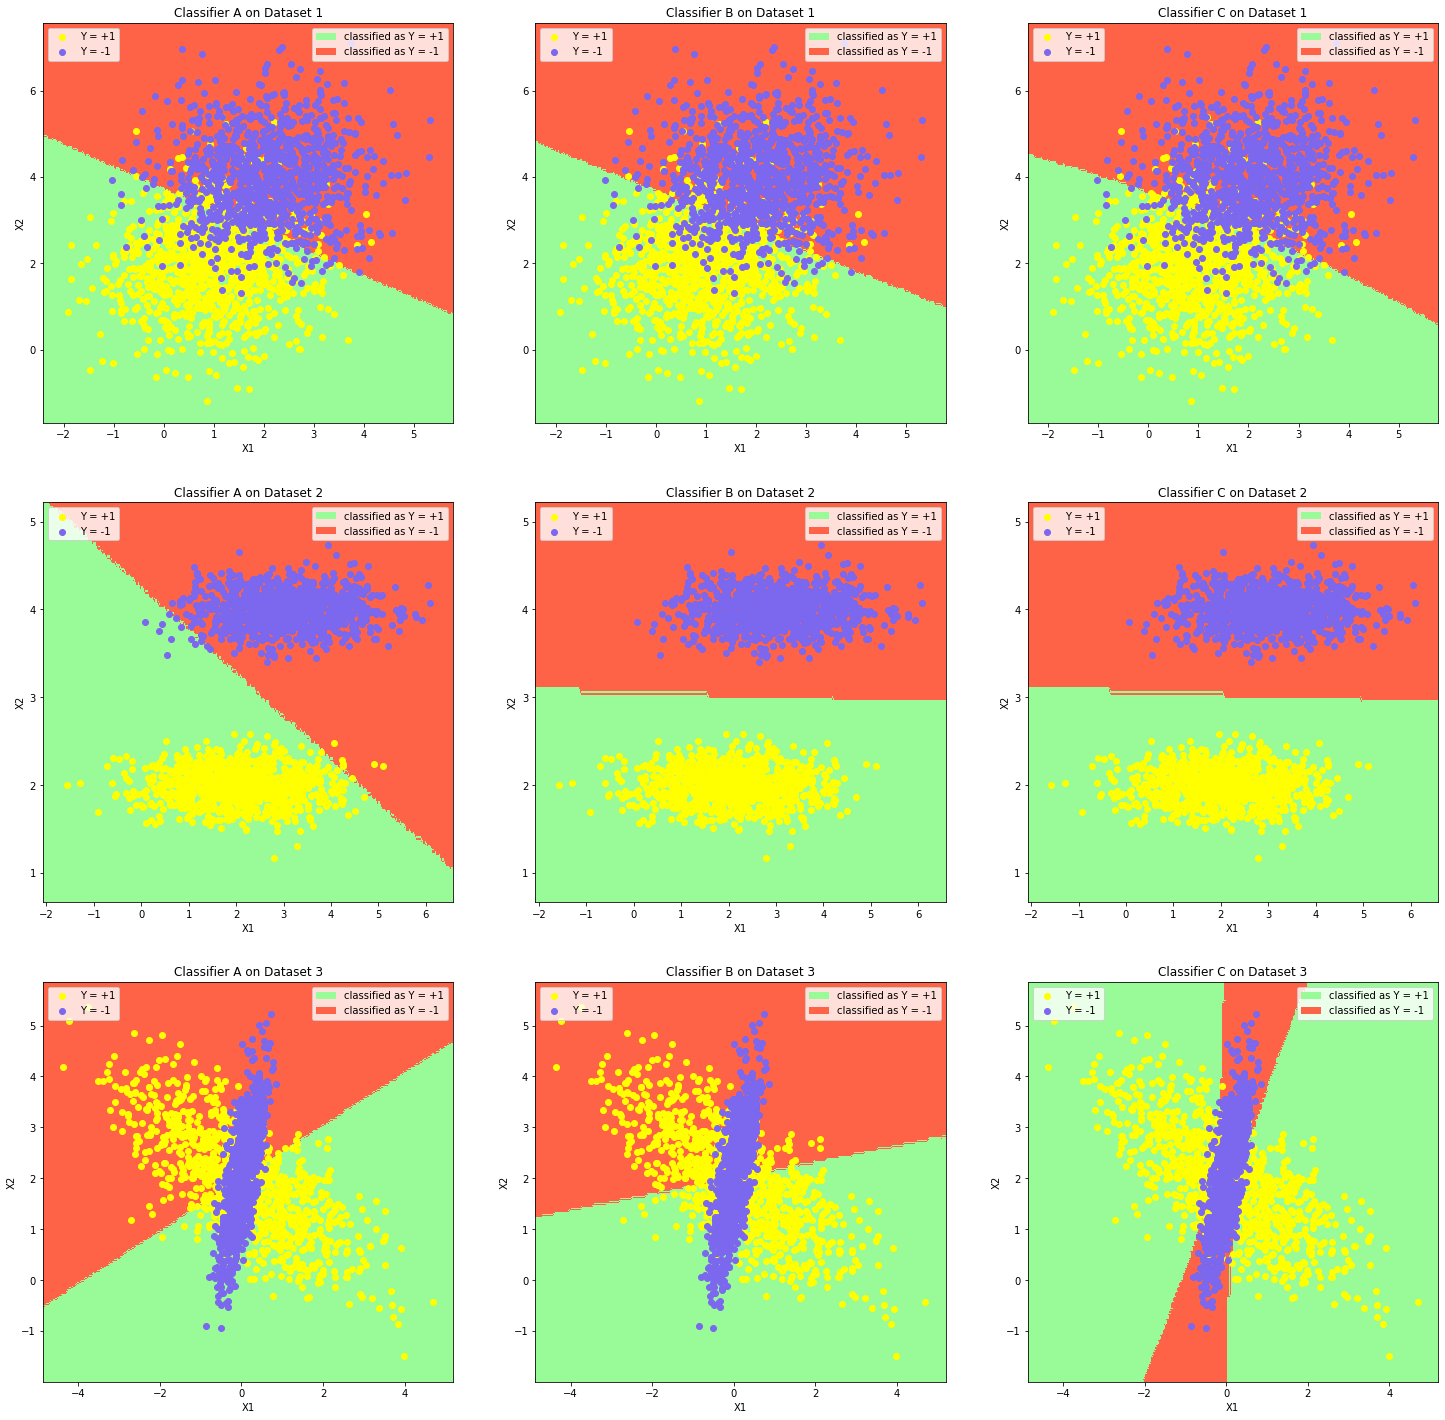

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
data1_1 = np.load('Data/dataset1_1.npz')
X_train1, Y_train1, X_test1, Y_test1 = data1_1['arr_0'], data1_1['arr_1'], data1_1['arr_2'], data1_1['arr_3']
Y_pred_a_1 = Bayes1a(X_train1, Y_train1, X_test1)
Y_pred_b_1 = Bayes1b(X_train1, Y_train1, X_test1)
Y_pred_c_1 = Bayes1c(X_train1, Y_train1, X_test1)
X_min1 = min(X_train1[:,0]),min(X_train1[:,1])
X_max1 = max(X_train1[:,0]),max(X_train1[:,1])

data1_2 = np.load('Data/dataset1_2.npz')
X_train2, Y_train2, X_test2, Y_test2 = data1_2['arr_0'], data1_2['arr_1'], data1_2['arr_2'], data1_2['arr_3']
Y_pred_a_2 = Bayes1a(X_train2, Y_train2, X_test2)
Y_pred_b_2 = Bayes1b(X_train2, Y_train2, X_test2)
Y_pred_c_2 = Bayes1c(X_train2, Y_train2, X_test2)
X_min2 = min(X_train2[:,0]),min(X_train2[:,1])
X_max2 = max(X_train2[:,0]),max(X_train2[:,1])

data1_3 = np.load('Data/dataset1_3.npz')
X_train3, Y_train3, X_test3, Y_test3 = data1_3['arr_0'], data1_3['arr_1'], data1_3['arr_2'], data1_3['arr_3']
Y_pred_a_3 = Bayes1a(X_train3, Y_train3, X_test3)
Y_pred_b_3 = Bayes1b(X_train3, Y_train3, X_test3)
Y_pred_c_3 = Bayes1c(X_train3, Y_train3, X_test3)
X_min3 = min(X_train3[:,0]),min(X_train3[:,1])
X_max3 = max(X_train3[:,0]),max(X_train3[:,1])

error_mat = np.ndarray(shape = (3, 3))
error_mat[0][0] = 1 - (Y_pred_a_1 == Y_test1).sum()*1.00/len(Y_test1)
error_mat[0][1] = 1 - (Y_pred_b_1 == Y_test1).sum()*1.00/len(Y_test1)
error_mat[0][2] = 1 - (Y_pred_c_1 == Y_test1).sum()*1.00/len(Y_test1)
error_mat[1][0] = 1 - (Y_pred_a_2 == Y_test2).sum()*1.00/len(Y_test2)
error_mat[1][1] = 1 - (Y_pred_b_2 == Y_test2).sum()*1.00/len(Y_test2)
error_mat[1][2] = 1 - (Y_pred_c_2 == Y_test2).sum()*1.00/len(Y_test2)
error_mat[2][0] = 1 - (Y_pred_a_3 == Y_test3).sum()*1.00/len(Y_test3)
error_mat[2][1] = 1 - (Y_pred_b_3 == Y_test3).sum()*1.00/len(Y_test3)
error_mat[2][2] = 1 - (Y_pred_c_3 == Y_test3).sum()*1.00/len(Y_test3)
#print(error_mat)

X1, Y1 = np.meshgrid(np.arange(X_min1[0]-0.5,X_max1[0]+0.5,0.05), np.arange(X_min1[1]-0.5,X_max1[1]+0.5,0.05))
test_samples1= np.concatenate([X1.reshape(-1,1),Y1.reshape(-1,1)],axis=1)
Z11 = Bayes1a(X_train1,Y_train1,test_samples1)
Z12 = Bayes1b(X_train1,Y_train1,test_samples1)
Z13 = Bayes1c(X_train1,Y_train1,test_samples1)

X2, Y2 = np.meshgrid(np.arange(X_min2[0]-0.5,X_max2[0]+0.5,0.05), np.arange(X_min2[1]-0.5,X_max2[1]+0.5,0.05))
test_samples2= np.concatenate([X2.reshape(-1,1),Y2.reshape(-1,1)],axis=1)
Z21 = Bayes1a(X_train2,Y_train2,test_samples2)
Z22 = Bayes1b(X_train2,Y_train2,test_samples2)
Z23 = Bayes1c(X_train2,Y_train2,test_samples2)

X3, Y3 = np.meshgrid(np.arange(X_min3[0]-0.5,X_max3[0]+0.5,0.05), np.arange(X_min3[1]-0.5,X_max3[1]+0.5,0.05))
test_samples3= np.concatenate([X3.reshape(-1,1),Y3.reshape(-1,1)],axis=1)
Z31 = Bayes1a(X_train3,Y_train3,test_samples3)
Z32 = Bayes1b(X_train3,Y_train3,test_samples3)
Z33 = Bayes1c(X_train3,Y_train3,test_samples3)

plt.figure(figsize=(25,25))

plt.subplot(3,3,1)
plt.gca().set_title("Classifier A on Dataset 1")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,Y1,Z11.reshape(X1.shape),colors=['tomato', 'palegreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="yellow", label="Y = +1")
plt.scatter(X_train1[Y_train1==-1].T[0], X_train1[Y_train1==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,2)
plt.gca().set_title("Classifier B on Dataset 1")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,Y1,Z12.reshape(X1.shape),colors=['tomato', 'palegreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="yellow", label="Y = +1")
plt.scatter(X_train1[Y_train1==-1].T[0], X_train1[Y_train1==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,3)
plt.gca().set_title("Classifier C on Dataset 1")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,Y1,Z13.reshape(X1.shape),colors=['tomato', 'palegreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="yellow", label="Y = +1")
plt.scatter(X_train1[Y_train1==-1].T[0], X_train1[Y_train1==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,4)
plt.gca().set_title("Classifier A on Dataset 2")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X2,Y2,Z21.reshape(X2.shape),colors=['tomato', 'palegreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="yellow", label="Y = +1")
plt.scatter(X_train2[Y_train2==-1].T[0], X_train2[Y_train2==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,5)
plt.gca().set_title("Classifier B on Dataset 2")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X2,Y2,Z22.reshape(X2.shape),colors=['tomato', 'palegreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="yellow", label="Y = +1")
plt.scatter(X_train2[Y_train2==-1].T[0], X_train2[Y_train2==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,6)
plt.gca().set_title("Classifier C on Dataset 2")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X2,Y2,Z23.reshape(X2.shape),colors=['tomato', 'palegreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="yellow", label="Y = +1")
plt.scatter(X_train2[Y_train2==-1].T[0], X_train2[Y_train2==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,7)
plt.gca().set_title("Classifier A on Dataset 3")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X3,Y3,Z31.reshape(X3.shape),colors=['tomato', 'palegreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train3[Y_train3==1].T[0], X_train3[Y_train3==1].T[1], c="yellow", label="Y = +1")
plt.scatter(X_train3[Y_train3==-1].T[0], X_train3[Y_train3==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,8)
plt.gca().set_title("Classifier B on Dataset 3")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X3,Y3,Z32.reshape(X3.shape),colors=['tomato', 'palegreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train3[Y_train3==1].T[0], X_train3[Y_train3==1].T[1], c="yellow", label="Y = +1")
plt.scatter(X_train3[Y_train3==-1].T[0], X_train3[Y_train3==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,9)
plt.gca().set_title("Classifier C on Dataset 3")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X3,Y3,Z33.reshape(X3.shape),colors=['tomato', 'palegreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train3[Y_train3==1].T[0], X_train3[Y_train3==1].T[1], c="yellow", label="Y = +1")
plt.scatter(X_train3[Y_train3==-1].T[0], X_train3[Y_train3==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

### **Error Matrix**

Error values between 0 to 1 (that is fractional values, not percentage)

dataset | Classifier 1a | Classifier 1b | Classifier 1c
:--------:| :--------------:|:---------------:|:--------------:|
dataset 1 | 0.126 |  0.1245 | 0.1245 |
dataset 2 | 0.0085 | 0.0 | 0.0 |
dataset 3 | 0.497 | 0.495 | 0.135 |

### **Observations**


1.   Classifier (a) can handle data for which the features are conditionally independent given the classes. The decision boundary is a linear function of the features. The decision boundary is given as $w^{T}x+b$, where $w=\mu_1-\mu_2$ and $b=\frac{1}{2}\mu_1^{T}\mu_1 - \frac{1}{2}\mu_2^{T}\mu_2 + ln(\frac{1-p}{p})$ 
2.   Classifier (b) can handle data with a common covariance matrix between the class conditional distributions. That is, given the label, the features are correlated, but the covariance matrix is the same for data from both classes. As a result, even in this case, the decision boundary is linear with respect to the features. The decision boundary is given as $w^{T}x+b$, where $w=\mu_1-\mu_2$ and $b=\frac{1}{2}\mu_1^{T}\Sigma^{-1}\mu_1 - \frac{1}{2}\mu_2^{T}\Sigma^{-1}\mu_2 + ln(\frac{1-p}{p})$
3. Classifier (c) can handle data with different covariance matrices in the class conditional distributions. As a result, the classifier decision boundary can possibly be a non-linear function of the features.
4. The datapoints in dataset1 are distributed randomly around the mean for each cluster. As a result, the features appear to be unrelated. As a result, we anticipate similar performance from all three classifiers, as demonstrated by the plots above.
5. The features in dataset2 are correlated, but the datapoints are linearly separable. In case (a), the classifier decision boundary is always perpendicular to the line connecting the mean vectors of the class conditional distributions. Classifier (b), which incorporates feature covariance, is better able to separate the datapoints. A equivalent reasoning stands for classiﬁer (c).
6. For the third dataset, a linear boundary cannot separate the data into two classes, so classifiers (a) and (b) fail to perform well. The error rates for the two classifiers clearly demonstrate this. Classifier (c) can model non-linear decision boundaries and thus distinguish between the two classes' datapoints.
7. Overall, Classifier (c) seems to have the best performance.

PS: The decision boundaries mentioned in bullets 1 and 2 were calculated by-hand. 




** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [2]:
# Cell type : CodeWrite
# Fill in functions in this cell
def decision(prior, cov, mu, X_test):
    """ Gives the posterior probability (unscaled) of the given data instance 
    belonging to a particular class whose prior is known/estimated

    Arguments:
    prior: prior probability of the class under examination
    cov: covairance of the class/dataset under examination
    mu: ML estimate for the mean of the class under examination
    X_test: numpy array of shape (m,d)

    Returns:
    probab: the unscaled posterior probability of a data point belonging to the 
            class under examination  

    """
    det_cov = np.linalg.det(cov)
    central_term = (X_test -  mu)
    cov_inv = np.linalg.inv(cov)
    exp_term = (-0.5)*(((central_term@cov_inv)*central_term).sum(axis=0))
    probab = (prior*np.exp(exp_term))/(det_cov**0.5)
    return probab

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = [[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]]

    x = [X_train[Y_train == i, :] for i in range(1,5)]

    prior = [len(x[i])/len(X_train) for i in range(4)]
    
    mu = [np.mean(x[i], axis = 0) for i in range(4)]

    cov = np.identity(X_test.shape[1], dtype = float)

    Y_test_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        v1 = decision(prior[0], cov, mu[0], X_test[i, :])
        v2 = decision(prior[1], cov, mu[1], X_test[i, :])
        v3 = decision(prior[2], cov, mu[2], X_test[i, :])
        v4 = decision(prior[3], cov, mu[3], X_test[i, :])

        eta = [v1, v2, v3, v4]
        threshold = (np.transpose(eta))@L

        Y_test_pred[i] = np.argmin(threshold) + 1

    return Y_test_pred

   
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = [[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]]

    x = [X_train[Y_train == i, :] for i in range(1,5)]

    prior = [len(x[i])/len(X_train) for i in range(4)]
    
    mu = [np.mean(x[i], axis = 0) for i in range(4)]

    cov = [np.cov(np.transpose(x[i]), bias = True)*len(x[i]) for i in range(4)]
    
    covariance = (cov[0] + cov[1] + cov[2] + cov[3])/len(X_train)

    Y_test_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        v1 = decision(prior[0], covariance, mu[0], X_test[i, :])
        v2 = decision(prior[1], covariance, mu[1], X_test[i, :])
        v3 = decision(prior[2], covariance, mu[2], X_test[i, :])
        v4 = decision(prior[3], covariance, mu[3], X_test[i, :])

        eta = [v1, v2, v3, v4]
        threshold = (np.transpose(eta))@L

        Y_test_pred[i] = np.argmin(threshold) + 1

    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = [[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]]

    x = [X_train[Y_train == i, :] for i in range(1,5)]

    prior = [len(x[i])/len(X_train) for i in range(4)]
    
    mu = [np.mean(x[i], axis = 0) for i in range(4)]

    cov = [np.cov(np.transpose(x[i]), bias = True) for i in range(4)]

    Y_test_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        v1 = decision(prior[0], cov[0], mu[0], X_test[i, :])
        v2 = decision(prior[1], cov[1], mu[1], X_test[i, :])
        v3 = decision(prior[2], cov[2], mu[2], X_test[i, :])
        v4 = decision(prior[3], cov[3], mu[3], X_test[i, :])

        eta = [v1, v2, v3, v4]
        threshold = (np.transpose(eta))@L

        Y_test_pred[i] = np.argmin(threshold) + 1

    return Y_test_pred

def confusion_mat(Y, Y_pred):
    """ Evaluates the confusion matrix for a set of predictions in a classification problem

    Arguments:
    Y: true labels; shape = (m, )
    Y_pred: predictions; shape = (m, )

    Returns:
    c_mat: Confusion matrix of shape (n,n) , where n is the number of labels
    
    """
    labels = np.unique(Y)
    c_mat = np.zeros((len(labels),len(labels)))
    
    for i in range(len(labels)):
        for j in range(len(labels)):
            c_mat[i][j]  = ((Y==i+1)*(Y_pred==j+1)).sum()

    return c_mat

In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


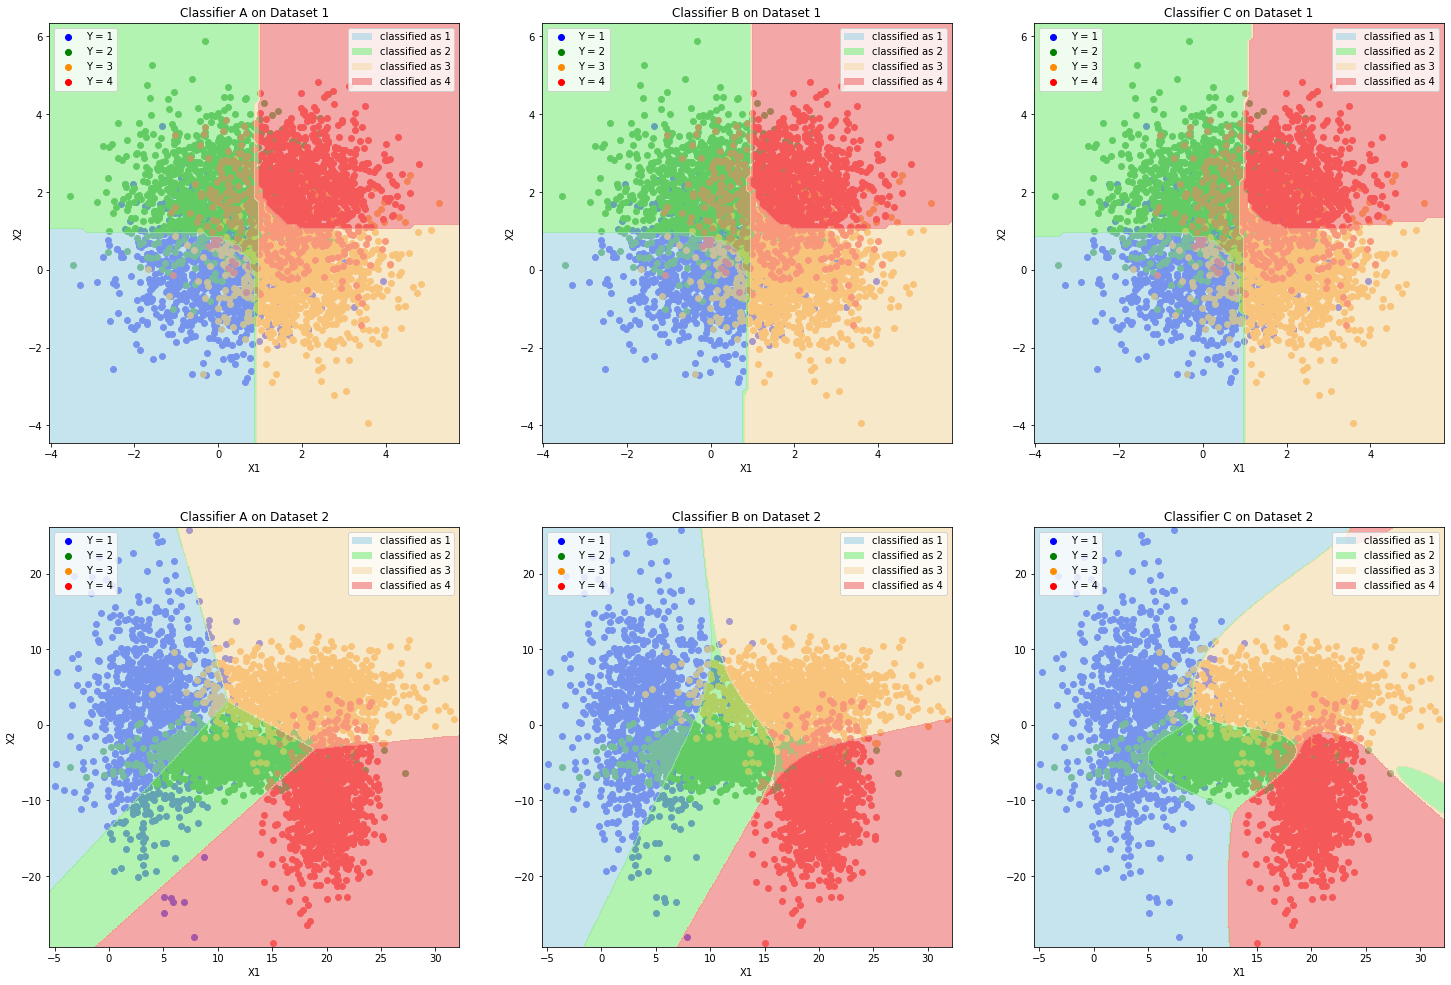

In [3]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

data2_1 = np.load('Data/dataset2_1.npz')
X_train1, Y_train1, X_test1, Y_test1 = data2_1['arr_0'], data2_1['arr_1'], data2_1['arr_2'], data2_1['arr_3']
Y_pred_a_1 = Bayes2a(X_train1, Y_train1, X_test1)
Y_pred_b_1 = Bayes2b(X_train1, Y_train1, X_test1)
Y_pred_c_1 = Bayes2c(X_train1, Y_train1, X_test1)
X_min1 = min(X_train1[:,0]),min(X_train1[:,1])
X_max1 = max(X_train1[:,0]),max(X_train1[:,1])

data2_2 = np.load('Data/dataset2_2.npz')
X_train2, Y_train2, X_test2, Y_test2 = data2_2['arr_0'], data2_2['arr_1'], data2_2['arr_2'], data2_2['arr_3']
Y_pred_a_2 = Bayes2a(X_train2, Y_train2, X_test2)
Y_pred_b_2 = Bayes2b(X_train2, Y_train2, X_test2)
Y_pred_c_2 = Bayes2c(X_train2, Y_train2, X_test2)
X_min2 = min(X_train2[:,0]),min(X_train2[:,1])
X_max2 = max(X_train2[:,0]),max(X_train2[:,1])

loss1a = L[Y_test1.astype(int)-1,Y_pred_a_1.astype(int)-1]
loss1a = np.sum(loss1a,axis=0)*1.0/len(Y_test1)
loss1b = L[Y_test1.astype(int)-1,Y_pred_b_1.astype(int)-1]
loss1b = np.sum(loss1b,axis=0)*1.0/len(Y_test1)
loss1c = L[Y_test1.astype(int)-1,Y_pred_c_1.astype(int)-1]
loss1c = np.sum(loss1c,axis=0)*1.0/len(Y_test1)
loss2a = L[Y_test2.astype(int)-1,Y_pred_a_2.astype(int)-1]
loss2a = np.sum(loss2a,axis=0)*1.0/len(Y_test2)
loss2b = L[Y_test2.astype(int)-1,Y_pred_b_2.astype(int)-1]
loss2b = np.sum(loss2b,axis=0)*1.0/len(Y_test2)
loss2c = L[Y_test2.astype(int)-1,Y_pred_c_2.astype(int)-1]
loss2c = np.sum(loss2c,axis=0)*1.0/len(Y_test2)
loss_mat = np.ndarray(shape = (2, 3))
loss_mat[0][0] = loss1a
loss_mat[0][1] = loss1b
loss_mat[0][2] = loss1c
loss_mat[1][0] = loss2a
loss_mat[1][1] = loss2b
loss_mat[1][2] = loss2c
#print(loss_mat)

misclassify_mat = np.ndarray(shape = (2, 3))
misclassify_mat[0][0] = 1 - (Y_pred_a_1 == Y_test1).sum()*1.00/len(Y_test1)
misclassify_mat[0][1] = 1 - (Y_pred_b_1 == Y_test1).sum()*1.00/len(Y_test1)
misclassify_mat[0][2] = 1 - (Y_pred_c_1 == Y_test1).sum()*1.00/len(Y_test1)
misclassify_mat[1][0] = 1 - (Y_pred_a_2 == Y_test2).sum()*1.00/len(Y_test2)
misclassify_mat[1][1] = 1 - (Y_pred_b_2 == Y_test2).sum()*1.00/len(Y_test2)
misclassify_mat[1][2] = 1 - (Y_pred_c_2 == Y_test2).sum()*1.00/len(Y_test2)
#print(misclassify_mat)

#print('The confusion matrices of classifiers A, B and C for the first dataset are respectively:')
#print(confusion_mat(Y_test1, Y_pred_a_1))
#print(confusion_mat(Y_test1, Y_pred_b_1))
#print(confusion_mat(Y_test1, Y_pred_c_1))
#print('The confusion matrices of classifiers A, B and C for the second dataset are respectively:')
#print(confusion_mat(Y_test2, Y_pred_a_2))
#print(confusion_mat(Y_test2, Y_pred_b_2))
#print(confusion_mat(Y_test2, Y_pred_c_2))

X1, Y1 = np.meshgrid(np.arange(X_min1[0]-0.5,X_max1[0]+0.5,0.1), np.arange(X_min1[1]-0.5,X_max1[1]+0.5,0.1))
test_samples1= np.concatenate([X1.reshape(-1,1),Y1.reshape(-1,1)],axis=1)
Z11 = Bayes2a(X_train1,Y_train1,test_samples1)
Z12 = Bayes2b(X_train1,Y_train1,test_samples1)
Z13 = Bayes2c(X_train1,Y_train1,test_samples1)

X2, Y2 = np.meshgrid(np.arange(X_min2[0]-0.5,X_max2[0]+0.5,0.1), np.arange(X_min2[1]-0.5,X_max2[1]+0.5,0.1))
test_samples2= np.concatenate([X2.reshape(-1,1),Y2.reshape(-1,1)],axis=1)
Z21 = Bayes2a(X_train2,Y_train2,test_samples2)
Z22 = Bayes2b(X_train2,Y_train2,test_samples2)
Z23 = Bayes2c(X_train2,Y_train2,test_samples2)

plt.figure(figsize = (25,17))

plt.subplot(2,3,1)
plt.gca().set_title("Classifier A on Dataset 1")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="blue", label = "Y = 1")
plt.scatter(X_train1[Y_train1==2].T[0], X_train1[Y_train1==2].T[1], c="green", label = "Y = 2")
plt.scatter(X_train1[Y_train1==3].T[0], X_train1[Y_train1==3].T[1], c="darkorange", label = "Y = 3")
plt.scatter(X_train1[Y_train1==4].T[0], X_train1[Y_train1==4].T[1], c="red", label = "Y = 4")
contour = plt.legend(loc = "upper left")
a = plt.contourf(X1,Y1,Z11.reshape(X1.shape), levels = [0, 1, 2, 3, 4], colors = ["lightblue", "lightgreen", "wheat", "lightcoral"], alpha = 0.69)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
plt.legend(proxy, ["classified as " + str(i+1) for i in range(4)], loc = "upper right")    
plt.gca().add_artist(contour)

plt.subplot(2,3,2)
plt.gca().set_title("Classifier B on Dataset 1")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="blue", label = "Y = 1")
plt.scatter(X_train1[Y_train1==2].T[0], X_train1[Y_train1==2].T[1], c="green", label = "Y = 2")
plt.scatter(X_train1[Y_train1==3].T[0], X_train1[Y_train1==3].T[1], c="darkorange", label = "Y = 3")
plt.scatter(X_train1[Y_train1==4].T[0], X_train1[Y_train1==4].T[1], c="red", label = "Y = 4")
contour = plt.legend(loc = "upper left")
a = plt.contourf(X1,Y1,Z12.reshape(X1.shape), levels = [0, 1, 2, 3, 4], colors = ["lightblue", "lightgreen", "wheat", "lightcoral"], alpha = 0.69)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
plt.legend(proxy, ["classified as " + str(i+1) for i in range(4)], loc = "upper right")    
plt.gca().add_artist(contour)

plt.subplot(2,3,3)
plt.gca().set_title("Classifier C on Dataset 1")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="blue", label = "Y = 1")
plt.scatter(X_train1[Y_train1==2].T[0], X_train1[Y_train1==2].T[1], c="green", label = "Y = 2")
plt.scatter(X_train1[Y_train1==3].T[0], X_train1[Y_train1==3].T[1], c="darkorange", label = "Y = 3")
plt.scatter(X_train1[Y_train1==4].T[0], X_train1[Y_train1==4].T[1], c="red", label = "Y = 4")
contour = plt.legend(loc = "upper left")
a = plt.contourf(X1,Y1,Z13.reshape(X1.shape), levels = [0, 1, 2, 3, 4], colors = ["lightblue", "lightgreen", "wheat", "lightcoral"], alpha = 0.69)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
plt.legend(proxy, ["classified as " + str(i+1) for i in range(4)], loc = "upper right")    
plt.gca().add_artist(contour)

plt.subplot(2,3,4)
plt.gca().set_title("Classifier A on Dataset 2")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="blue", label = "Y = 1")
plt.scatter(X_train2[Y_train2==2].T[0], X_train2[Y_train2==2].T[1], c="green", label = "Y = 2")
plt.scatter(X_train2[Y_train2==3].T[0], X_train2[Y_train2==3].T[1], c="darkorange", label = "Y = 3")
plt.scatter(X_train2[Y_train2==4].T[0], X_train2[Y_train2==4].T[1], c="red", label = "Y = 4")
contour = plt.legend(loc = "upper left")
a = plt.contourf(X2,Y2,Z21.reshape(X2.shape), levels = [0, 1, 2, 3, 4], colors = ["lightblue", "lightgreen", "wheat", "lightcoral"], alpha = 0.69)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
plt.legend(proxy, ["classified as " + str(i+1) for i in range(4)], loc = "upper right")    
plt.gca().add_artist(contour)

plt.subplot(2,3,5)
plt.gca().set_title("Classifier B on Dataset 2")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="blue", label = "Y = 1")
plt.scatter(X_train2[Y_train2==2].T[0], X_train2[Y_train2==2].T[1], c="green", label = "Y = 2")
plt.scatter(X_train2[Y_train2==3].T[0], X_train2[Y_train2==3].T[1], c="darkorange", label = "Y = 3")
plt.scatter(X_train2[Y_train2==4].T[0], X_train2[Y_train2==4].T[1], c="red", label = "Y = 4")
contour = plt.legend(loc = "upper left")
a = plt.contourf(X2,Y2,Z22.reshape(X2.shape), levels = [0, 1, 2, 3, 4], colors = ["lightblue", "lightgreen", "wheat", "lightcoral"], alpha = 0.69)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
plt.legend(proxy, ["classified as " + str(i+1) for i in range(4)], loc = "upper right")    
plt.gca().add_artist(contour)

plt.subplot(2,3,6)
plt.gca().set_title("Classifier C on Dataset 2")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="blue", label = "Y = 1")
plt.scatter(X_train2[Y_train2==2].T[0], X_train2[Y_train2==2].T[1], c="green", label = "Y = 2")
plt.scatter(X_train2[Y_train2==3].T[0], X_train2[Y_train2==3].T[1], c="darkorange", label = "Y = 3")
plt.scatter(X_train2[Y_train2==4].T[0], X_train2[Y_train2==4].T[1], c="red", label = "Y = 4")
contour = plt.legend(loc = "upper left")
a = plt.contourf(X2,Y2,Z23.reshape(X2.shape), levels = [0, 1, 2, 3, 4], colors = ["lightblue", "lightgreen", "wheat", "lightcoral"], alpha = 0.69)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
plt.legend(proxy, ["classified as " + str(i+1) for i in range(4)], loc = "upper right")    
plt.gca().add_artist(contour)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

###**Observations**


1. Classifier 2a can best handle data whose features have no correlation for the given labels. Hence, they perform well only with linearly separable data.
2. Classifier 2b can best handle data for which the class conditional distributions have a common covariance matrix.
3. Classifier 2c can handle data with different covariance matrices for the class conditional distributions. This results in greater model flexibility, as made evident by the highly non-linear decision boundaries for the second datatset.
4. Given the class, the features in the first dataset appear to be uncorrelated. As a result, the decision boundaries of all three models are strikingly similar. As anticipated, Classifier 2c achieves the lowest 'expected loss.'
5. In the second dataset, the class conditional distributions seem to have differnt covariances across different classes  

*   For classifier 2a, the decision boundary between 2 classes would depend only upon the direction of the difference of their mean vectors. This tendency fails to capture the complexity of the data and hence, this classifier gives a poor performance.
*   Classifier 2b matches Classifier 2a in performance. This is due to its inability to handle different correlations between features for different classes. The expected loss in this scenario is also higher than that of classifier 2a. This is due to the fact that both classifiers are attempting to fit the incorrect model to the data, and fitting uniform covariance performs worse than ignoring dependencies for this data.
*   Classifier 2c gives the best performance, as evident from the expected loss value and the confusion matrix.




###**Expected Loss**
dataset | Classifier 2a | Classifier 2b | Classifier 2c
:--------:| :--------------:|:---------------:|:--------------:|
dataset 1 | 0.42975 |  0.429 | 0.42775 |
dataset 2 | 0.1835 | 0.1875 | 0.14075 |

###**Misclassification Matrix**
dataset | Classifier 2a | Classifier 2b | Classifier 2c
:--------:| :--------------:|:---------------:|:--------------:|
dataset 1 | 0.301 |  0.3 | 0.3005 |
dataset 2 | 0.1455 | 0.16525 | 0.10575 |

The Confusion matrices for the three classifiers, evaluated for both the datasets are as follows : 

**Dataset-1:**

Classifier 2(a):

\begin{align}
        \begin{pmatrix}
        633 & 219 & 136 & 12 \\
        97 & 738 & 62 & 103 \\
        86 & 49 & 770 & 95 \\
        15 & 136 & 194 & 655 \\ 
        \end{pmatrix}
    \end{align}

Classifier 2(b):

\begin{align}
        \begin{pmatrix}
        633 & 218 & 137 & 12 \\
        95 & 743 & 60 & 102 \\
        84 & 49 & 773 & 94 \\
        16 & 137 & 196 & 651 \\ 
        \end{pmatrix}
    \end{align}

Classifier 2(c):

\begin{align}
        \begin{pmatrix}
        634 & 217 & 138 & 11 \\
        99 & 742 & 61 & 98 \\
        87 & 47 & 772 & 94 \\
        15 & 134 & 201 & 650 \\ 
        \end{pmatrix}
    \end{align}

**Dataset-2:**

Classifier 2(a):

\begin{align}
        \begin{pmatrix}
        830 & 150 & 18 & 2 \\
        93 & 784 & 46 & 77 \\
        30 & 61 & 905 & 4 \\
        0 & 23 & 78 & 899 \\ 
        \end{pmatrix}
    \end{align}

Classifier 2(b):

\begin{align}
        \begin{pmatrix}
        891 & 106 & 3 & 0 \\
        119 & 691 & 124 & 66 \\
        23 & 196 & 864 & 7 \\
        0 & 5 & 102 & 893 \\ 
        \end{pmatrix}
    \end{align}

Classifier 2(c):

\begin{align}
        \begin{pmatrix}
        901 & 80 & 19 & 0 \\
        64 & 824 & 46 & 66 \\
        19 & 31 & 936 & 14 \\
        0 & 36 & 48 & 916 \\ 
        \end{pmatrix}
    \end{align}




**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<Figure size 432x288 with 0 Axes>

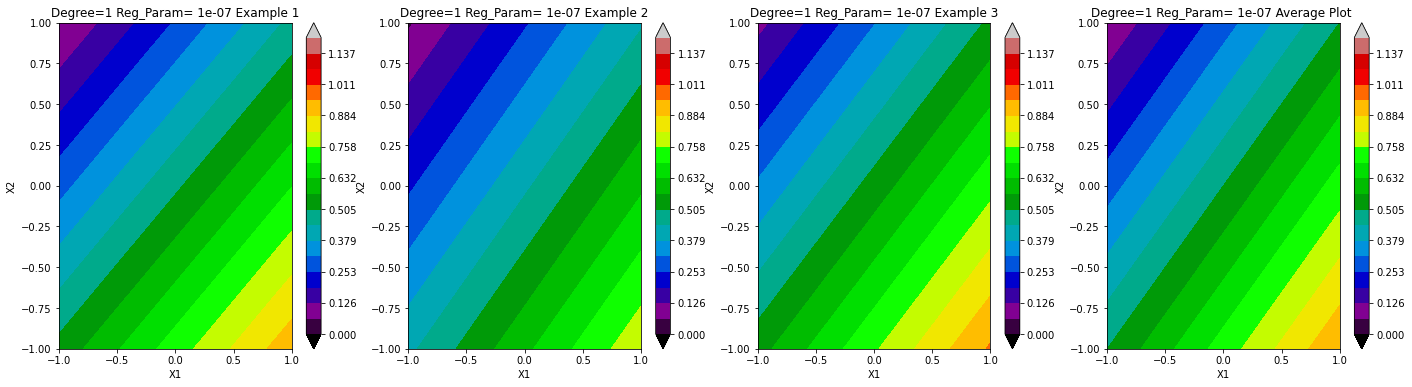

Degree= 1 lambda= 1e-07
Bias = 0.2324360562858357
Variance = 0.004057793723903346
MSE = 0.05808431398561552


<Figure size 432x288 with 0 Axes>

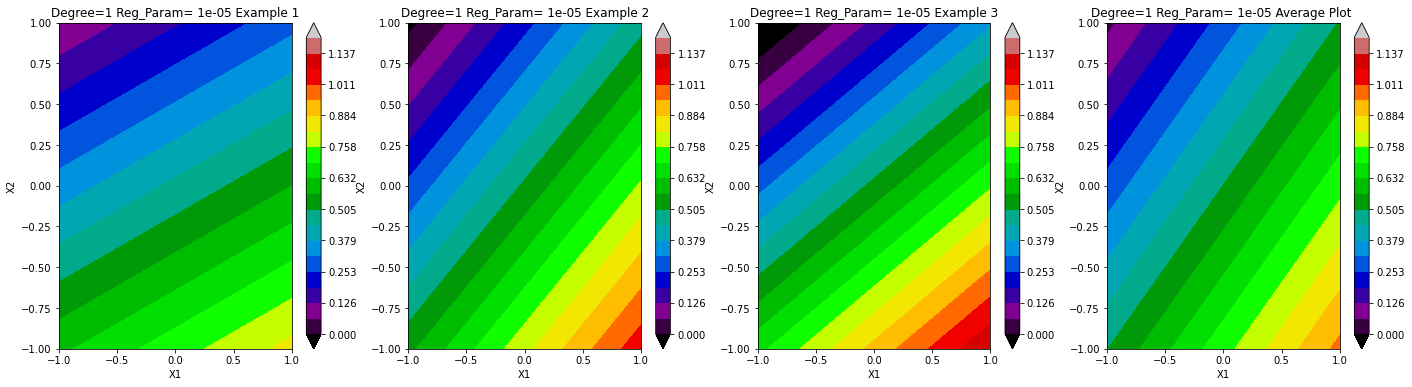

Degree= 1 lambda= 1e-05
Bias = 0.2325202021369482
Variance = 0.003964372301887299
MSE = 0.05803001670369455


<Figure size 432x288 with 0 Axes>

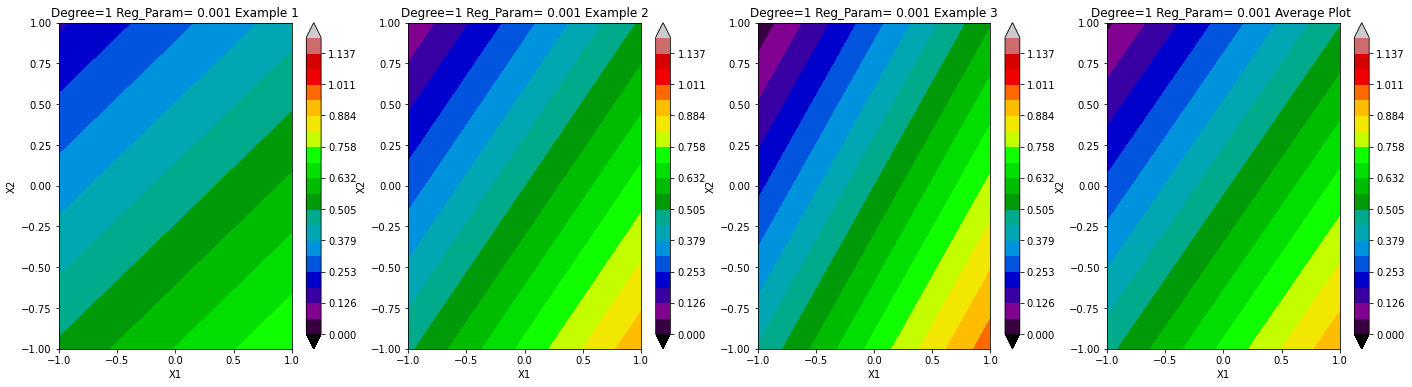

Degree= 1 lambda= 0.001
Bias = 0.2324646737607766
Variance = 0.003566471963047932
MSE = 0.05760629650975223


<Figure size 432x288 with 0 Axes>

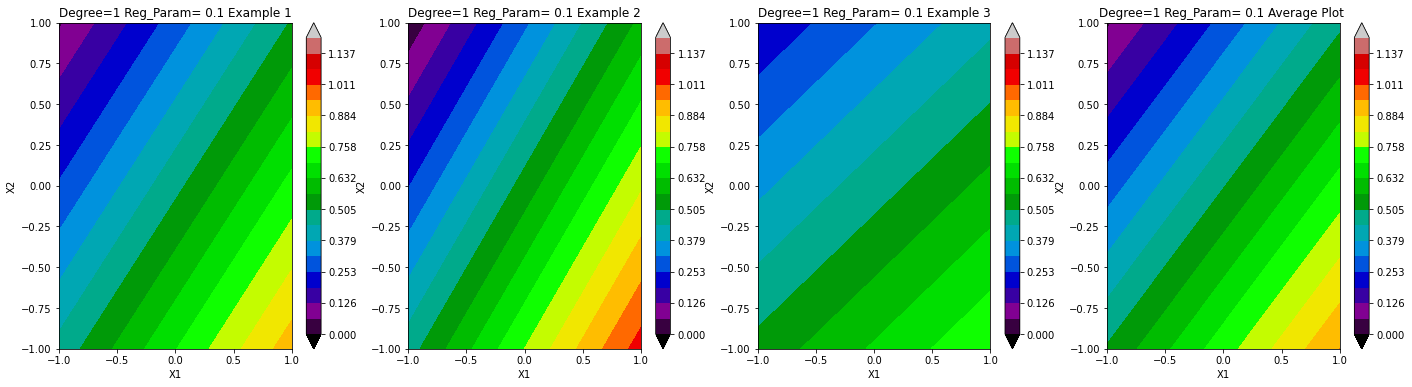

Degree= 1 lambda= 0.1
Bias = 0.23253190980333288
Variance = 0.003802627318004652
MSE = 0.05787371639478999


<Figure size 432x288 with 0 Axes>

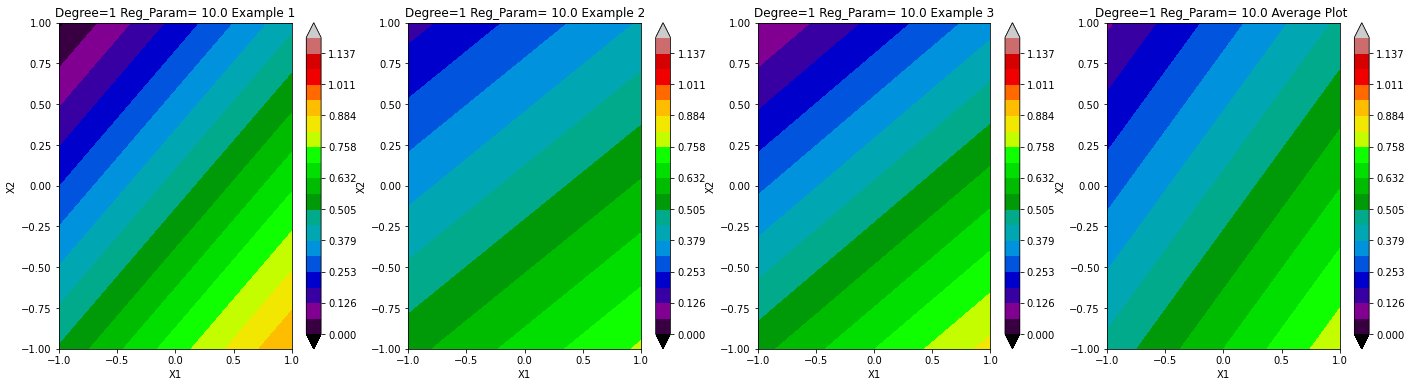

Degree= 1 lambda= 10.0
Bias = 0.23972282822759924
Variance = 0.002072354073491782
MSE = 0.05953938844693084


<Figure size 432x288 with 0 Axes>

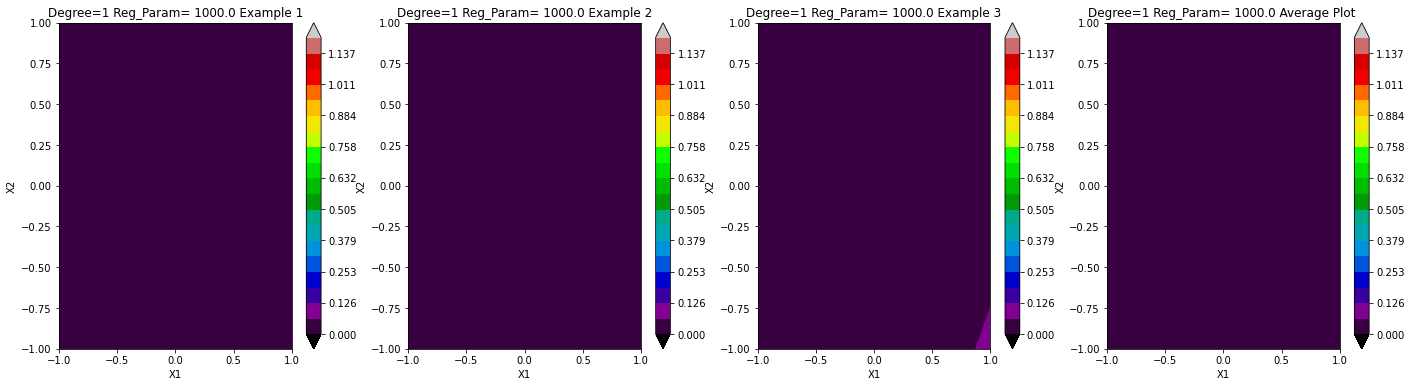

Degree= 1 lambda= 1000.0
Bias = 0.5399129575103501
Variance = 2.3734951755921464e-05
MSE = 0.291529736639329


<Figure size 432x288 with 0 Axes>

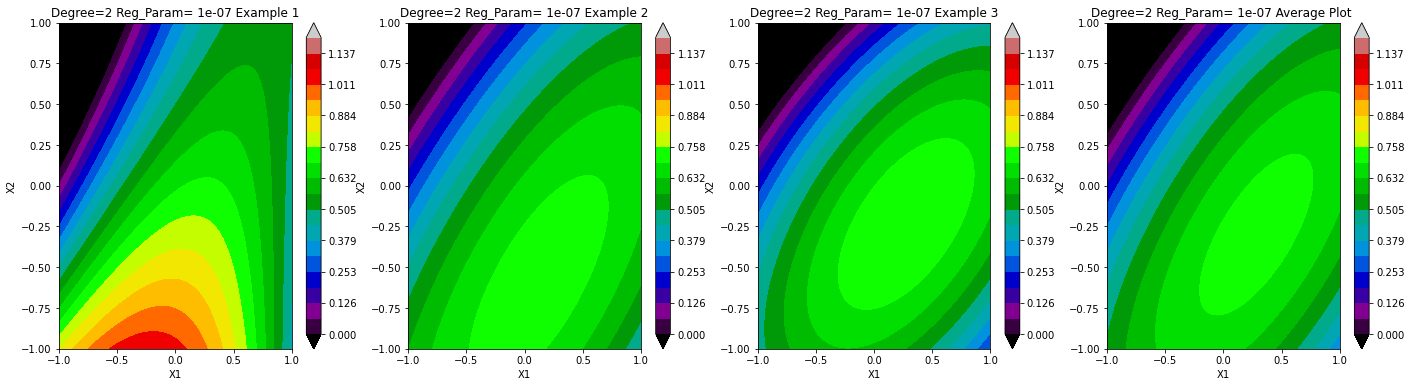

Degree= 2 lambda= 1e-07
Bias = 0.1847289263010424
Variance = 0.0054222640418691275
MSE = 0.039547040254205086


<Figure size 432x288 with 0 Axes>

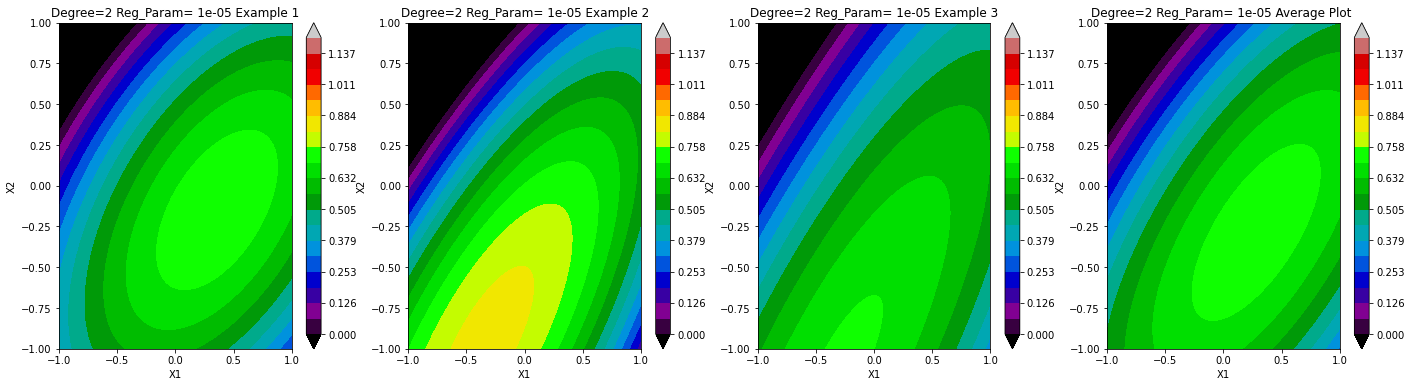

Degree= 2 lambda= 1e-05
Bias = 0.18530887358056336
Variance = 0.0057932955719806585
MSE = 0.04013267419967788


<Figure size 432x288 with 0 Axes>

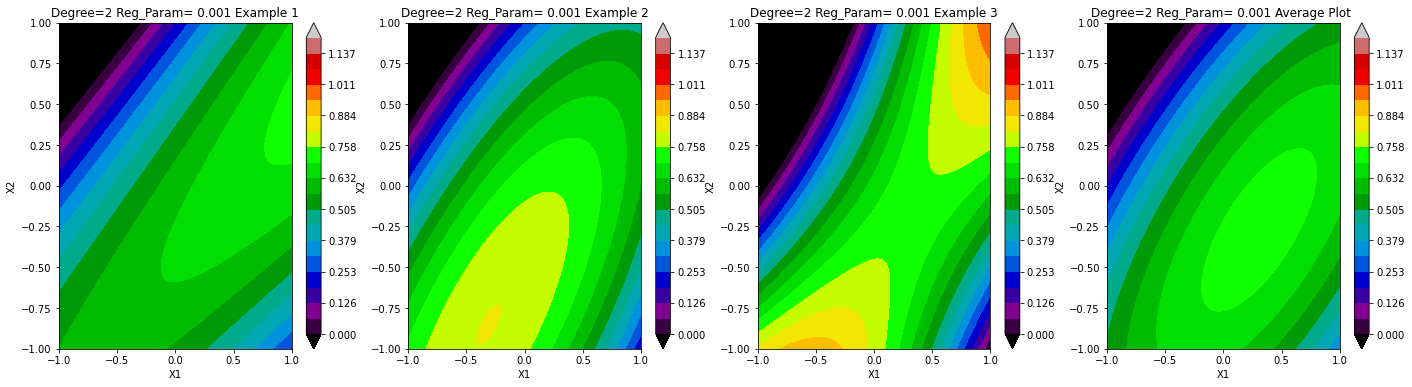

Degree= 2 lambda= 0.001
Bias = 0.1848367269184886
Variance = 0.005413539876907086
MSE = 0.03957815549484701


<Figure size 432x288 with 0 Axes>

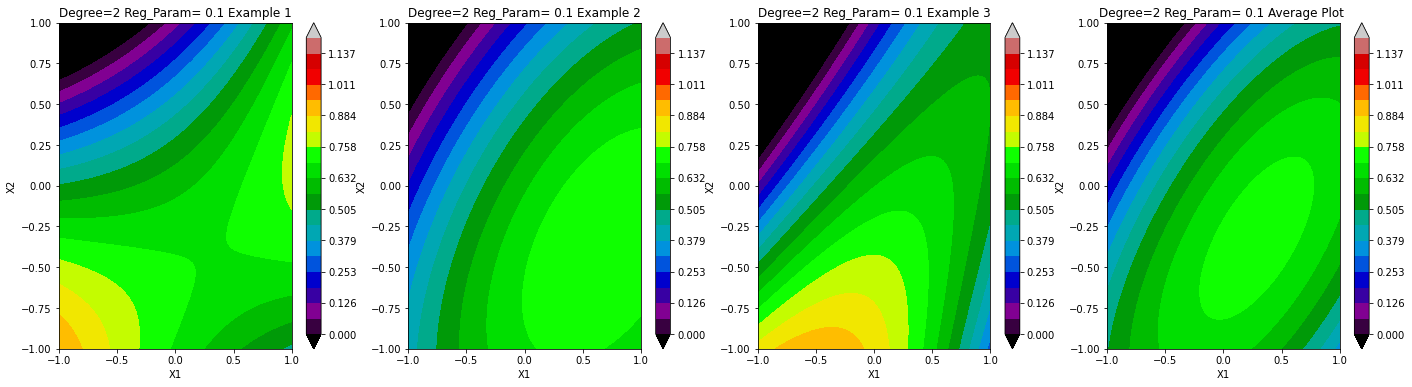

Degree= 2 lambda= 0.1
Bias = 0.18468923654784572
Variance = 0.005412998605000462
MSE = 0.03952311270162657


<Figure size 432x288 with 0 Axes>

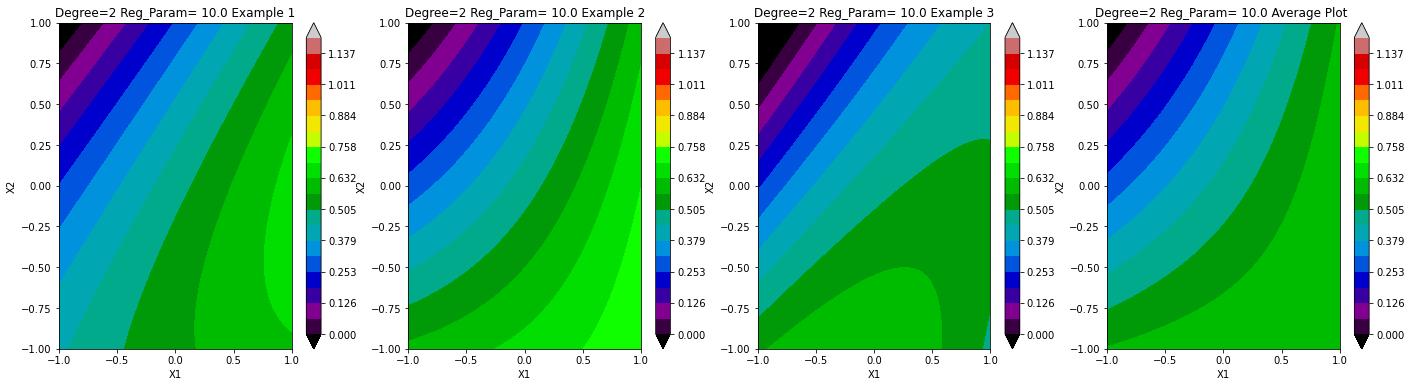

Degree= 2 lambda= 10.0
Bias = 0.2215062276161988
Variance = 0.002078251954081913
MSE = 0.051143260826841175


<Figure size 432x288 with 0 Axes>

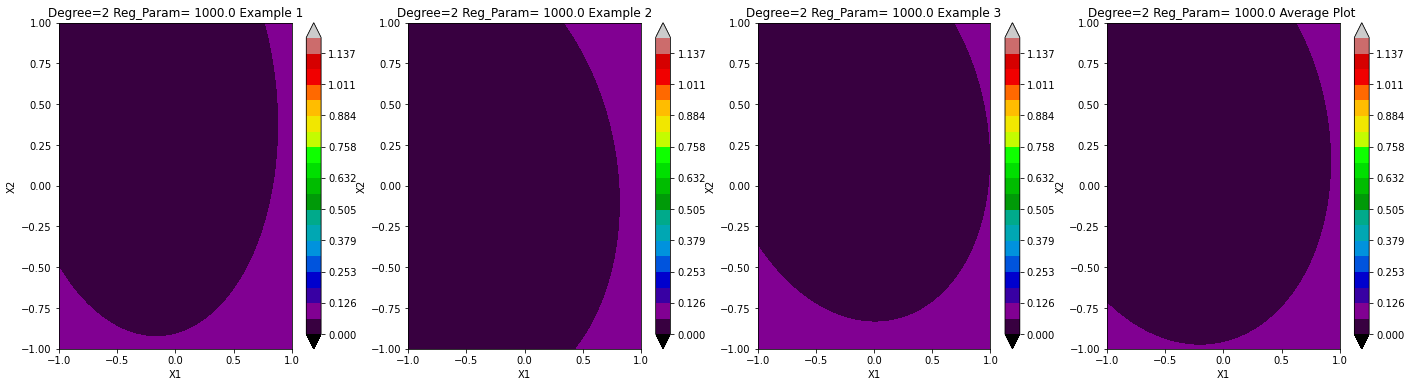

Degree= 2 lambda= 1000.0
Bias = 0.5338508885465345
Variance = 3.022589227185816e-05
MSE = 0.28502699709419627


<Figure size 432x288 with 0 Axes>

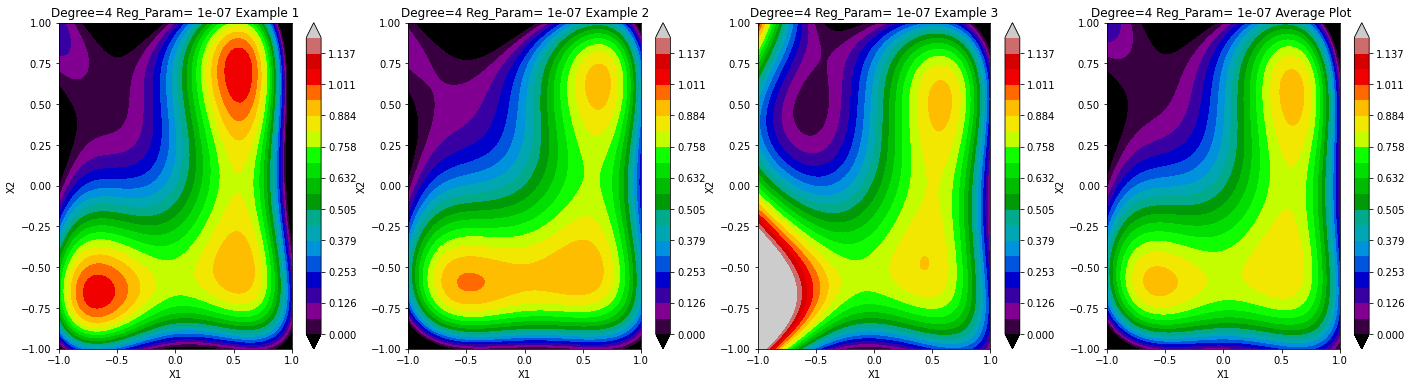

Degree= 4 lambda= 1e-07
Bias = 0.085247351734262
Variance = 0.009282296479977022
MSE = 0.016549407457682005


<Figure size 432x288 with 0 Axes>

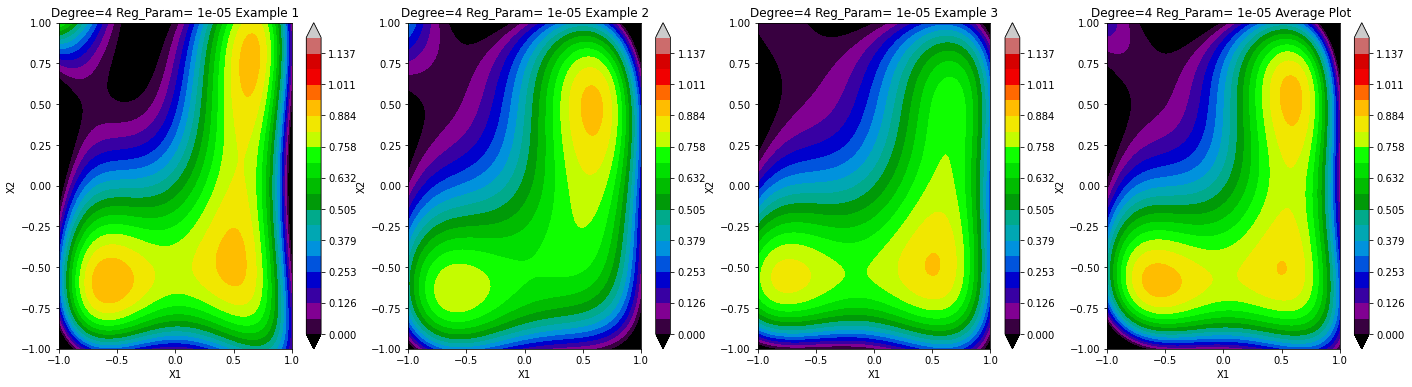

Degree= 4 lambda= 1e-05
Bias = 0.09153270400100745
Variance = 0.008288659811046793
MSE = 0.016666895712782837


<Figure size 432x288 with 0 Axes>

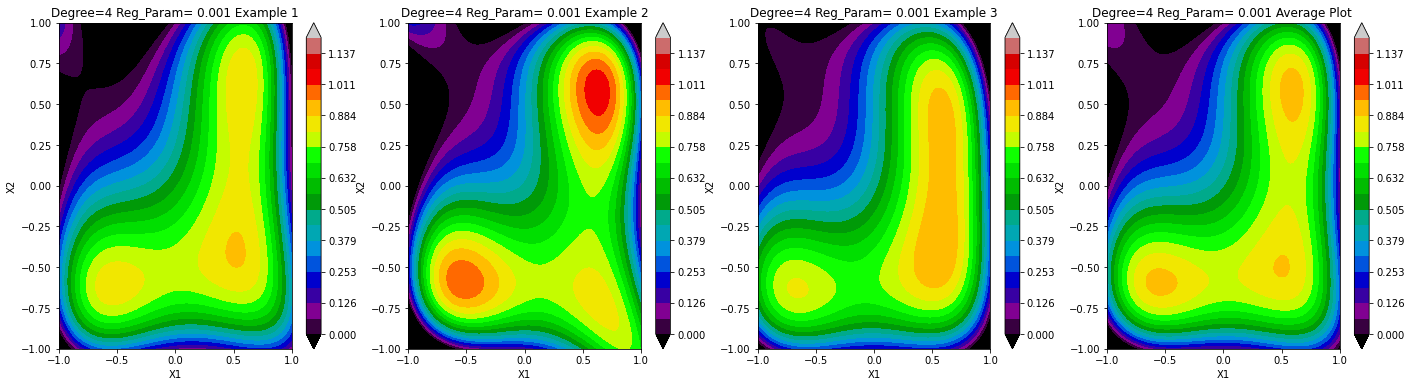

Degree= 4 lambda= 0.001
Bias = 0.08404549002193668
Variance = 0.010584747991387504
MSE = 0.01764839238441496


<Figure size 432x288 with 0 Axes>

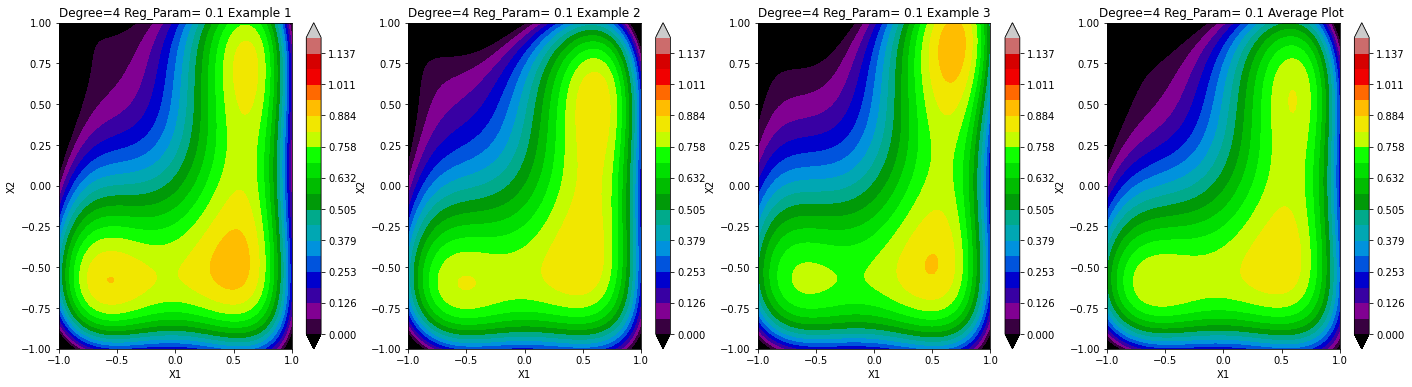

Degree= 4 lambda= 0.1
Bias = 0.08478540283639621
Variance = 0.003916143231485987
MSE = 0.011104707765615968


<Figure size 432x288 with 0 Axes>

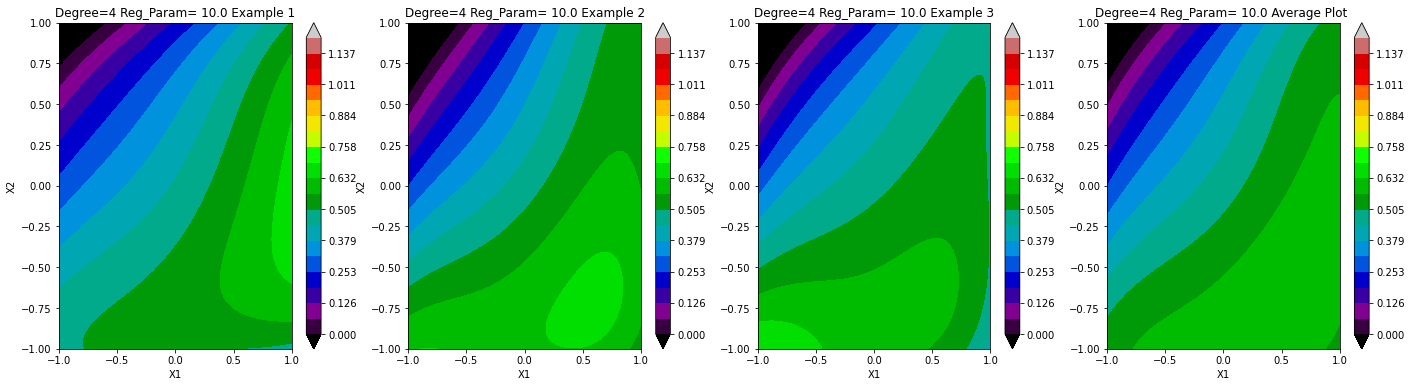

Degree= 4 lambda= 10.0
Bias = 0.21245463405341491
Variance = 0.003088379753156287
MSE = 0.048225351283926736


<Figure size 432x288 with 0 Axes>

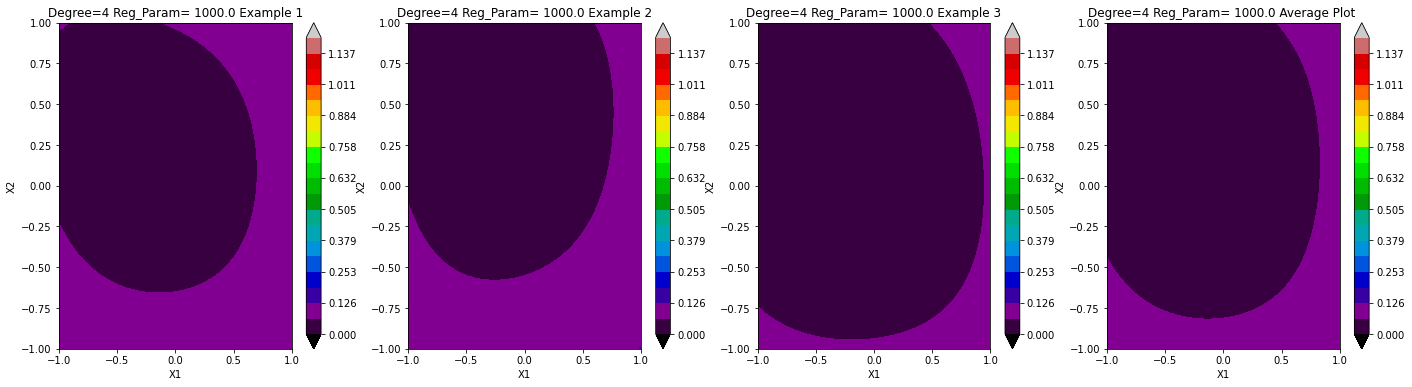

Degree= 4 lambda= 1000.0
Bias = 0.5320283415978475
Variance = 3.905557817276897e-05
MSE = 0.28309321184152864


<Figure size 432x288 with 0 Axes>

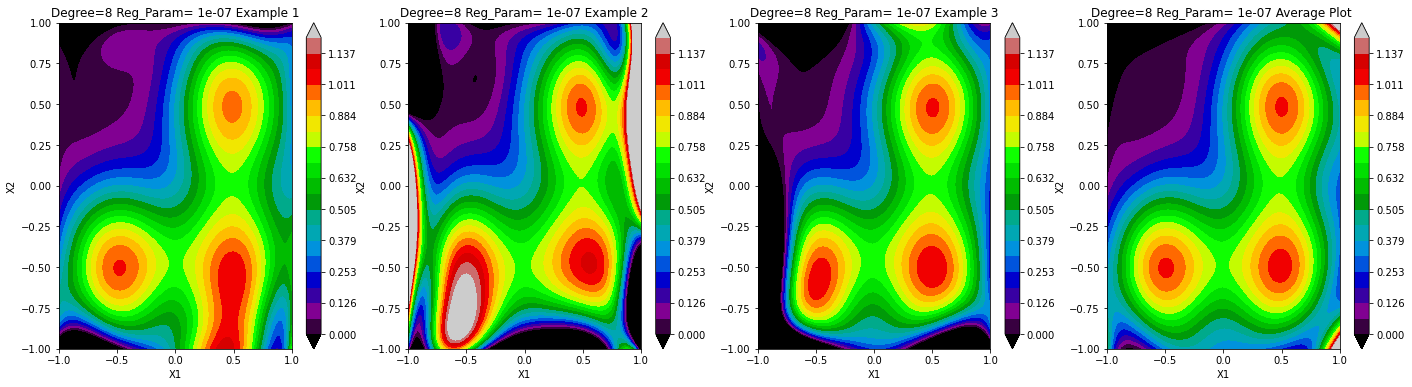

Degree= 8 lambda= 1e-07
Bias = 0.08999280899802987
Variance = 0.2432228815827151
MSE = 0.251321587254071


<Figure size 432x288 with 0 Axes>

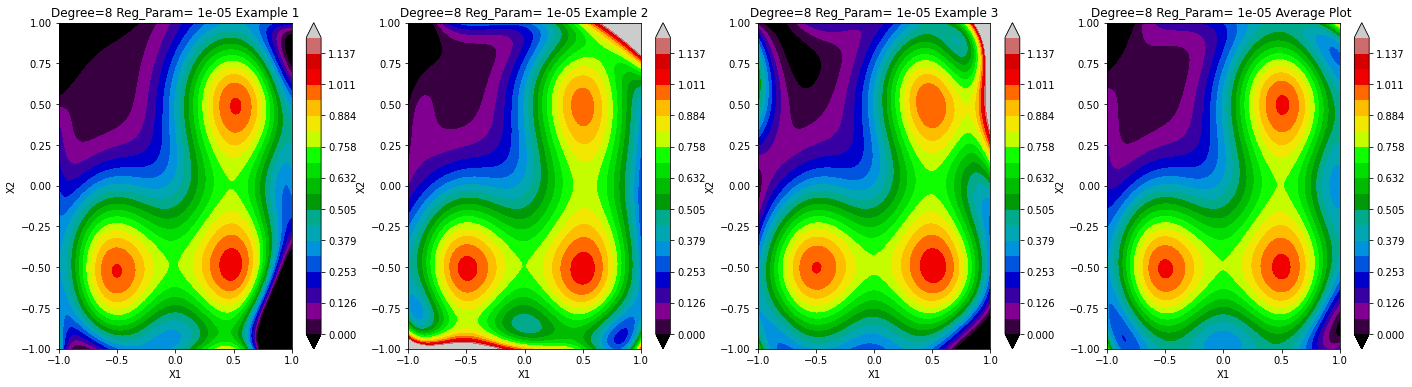

Degree= 8 lambda= 1e-05
Bias = 0.044955971930036726
Variance = 0.04207953349229692
MSE = 0.04410057290447117


<Figure size 432x288 with 0 Axes>

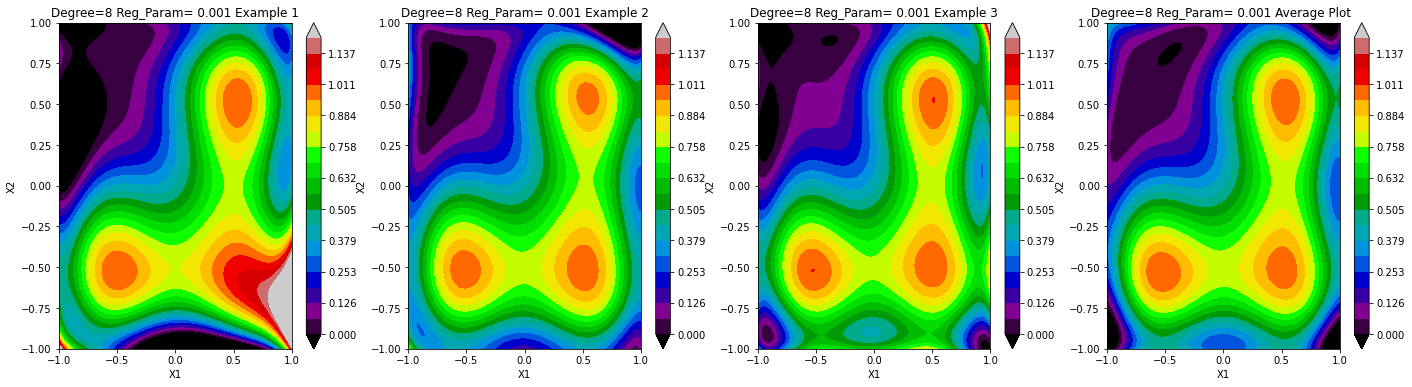

Degree= 8 lambda= 0.001
Bias = 0.06740075199294744
Variance = 0.021818633695769488
MSE = 0.026361495064984294


<Figure size 432x288 with 0 Axes>

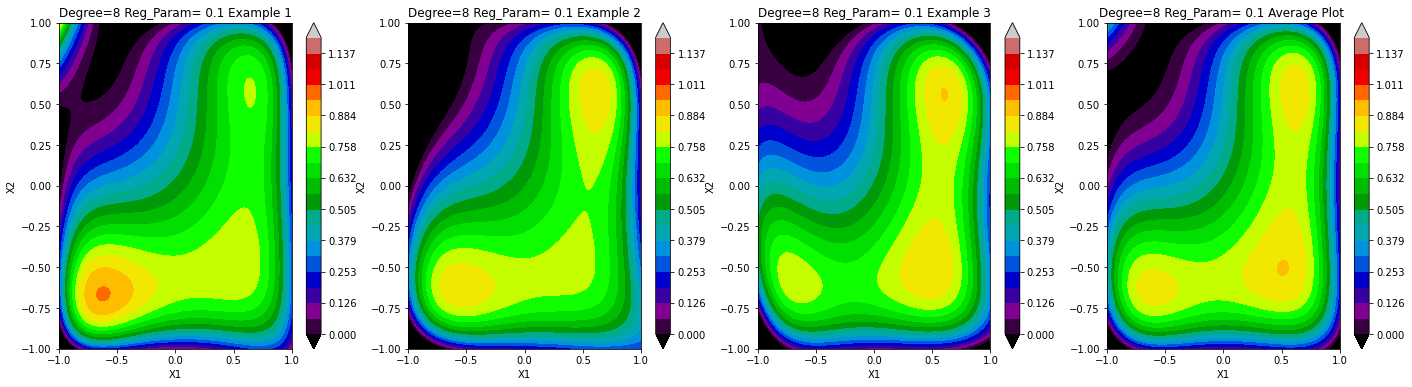

Degree= 8 lambda= 0.1
Bias = 0.09278356780736967
Variance = 0.0070212753356591355
MSE = 0.0156300657907239


<Figure size 432x288 with 0 Axes>

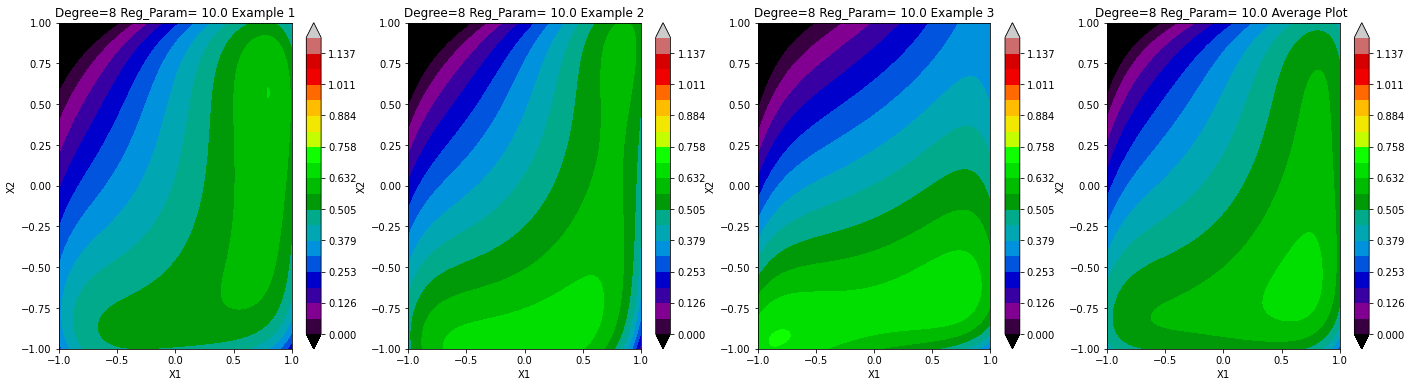

Degree= 8 lambda= 10.0
Bias = 0.20050724323979646
Variance = 0.00306385518209026
MSE = 0.043267009773713165


<Figure size 432x288 with 0 Axes>

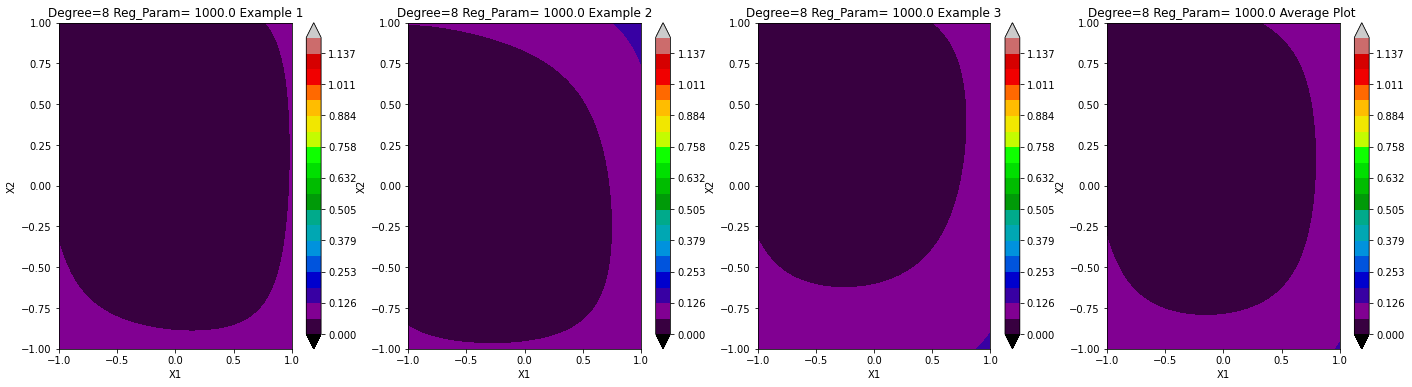

Degree= 8 lambda= 1000.0
Bias = 0.5313457839643619
Variance = 4.4334981192697e-05
MSE = 0.28237267711789515


<Figure size 432x288 with 0 Axes>

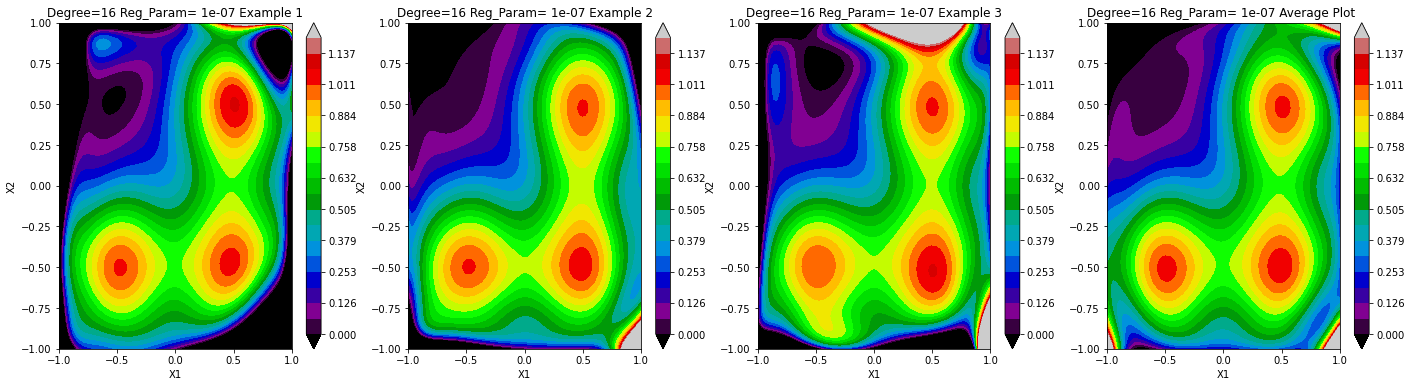

Degree= 16 lambda= 1e-07
Bias = 0.14637569969829234
Variance = 0.3624460609833298
MSE = 0.38387190644549446


<Figure size 432x288 with 0 Axes>

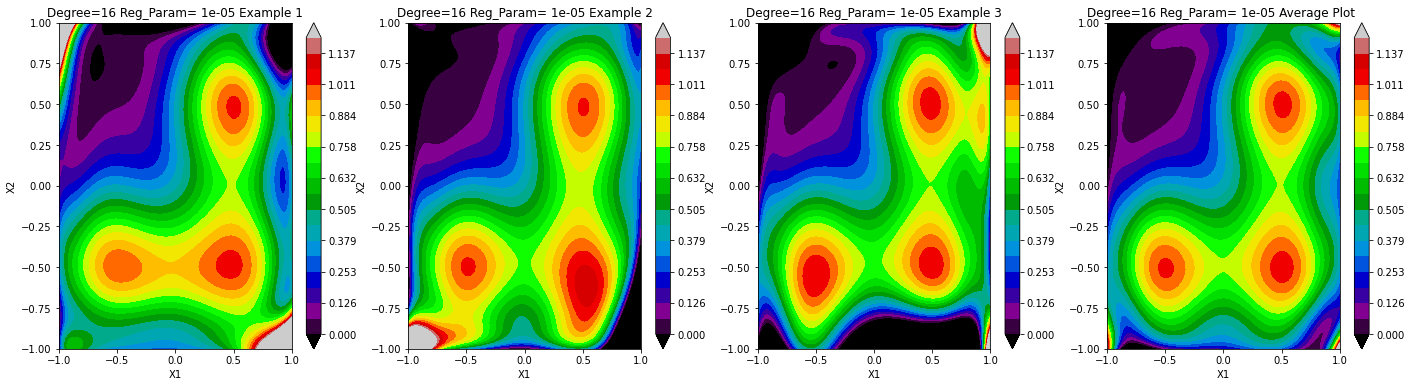

Degree= 16 lambda= 1e-05
Bias = 0.10745979228681597
Variance = 0.1607275650492478
MSE = 0.17227517200757342


<Figure size 432x288 with 0 Axes>

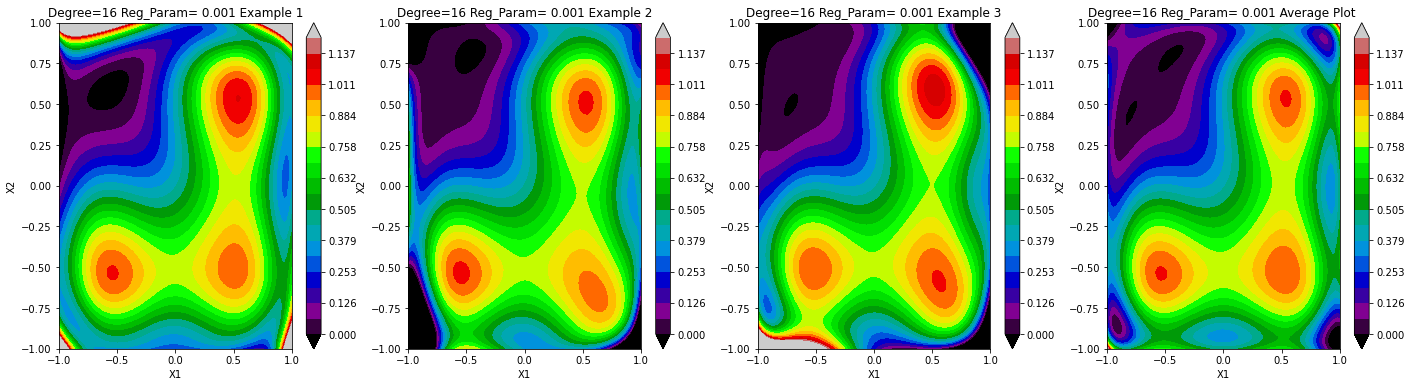

Degree= 16 lambda= 0.001
Bias = 0.07007675076127083
Variance = 0.05311208300067865
MSE = 0.058022833997935924


<Figure size 432x288 with 0 Axes>

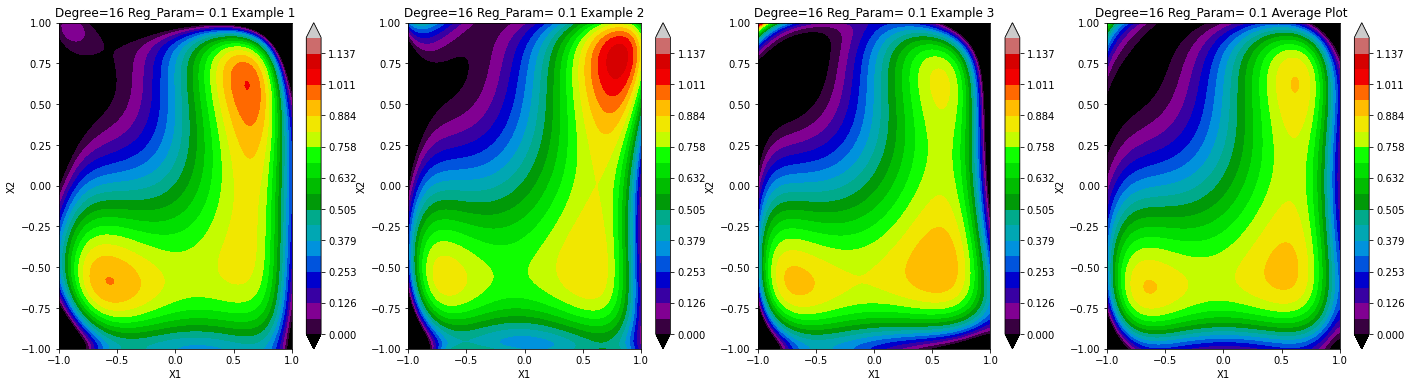

Degree= 16 lambda= 0.1
Bias = 0.10034266121381231
Variance = 0.013091606868790896
MSE = 0.02316025652826081


<Figure size 432x288 with 0 Axes>

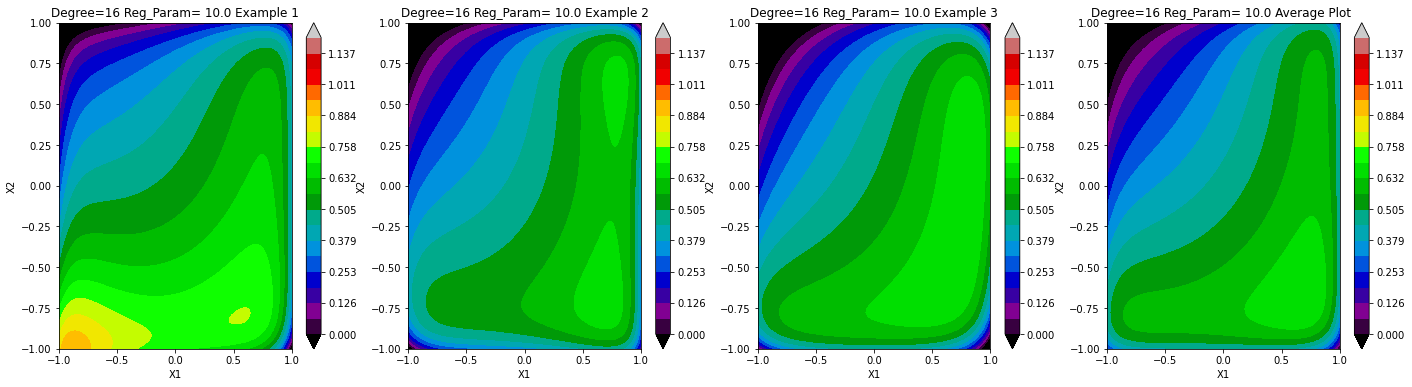

Degree= 16 lambda= 10.0
Bias = 0.19556708623489602
Variance = 0.0031740566490058133
MSE = 0.04142054186741308


<Figure size 432x288 with 0 Axes>

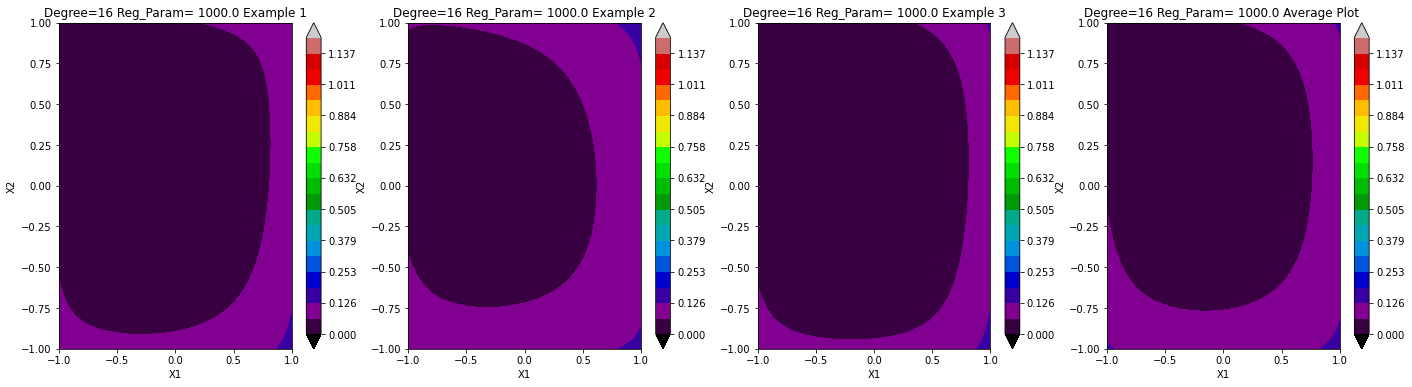

Degree= 16 lambda= 1000.0
Bias = 0.5298392770222841
Variance = 5.348880488033133e-05
MSE = 0.280783148280377


In [49]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    features =  np.ones(len(X_test))

    for i in range(1, degree+1):
        for j in range(0, i+1):
            features = np.vstack((features, (X_test.T)[0]**j * (X_test.T)[1]**(i-j)))

    Y_test_pred = (features.T)@wt_vector

    return Y_test_pred

def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    X1 = X.reshape((100*100,1))
    Y1 = Y.reshape((100*100,1))
    X_test =  np.concatenate((X1, Y1), axis=1)
    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    Z = Z.reshape((100,100))

    plt.contourf(X,Y,Z,levels=np.linspace(0., 1.2, 20), cmap = 'nipy_spectral', extend = 'both')
    plt.gca().set_title("Degree="+str(degree)+title)
    plt.gca().set_ylabel("X2")
    plt.gca().set_xlabel("X1")
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi = np.ones(len(X_train))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            phi = np.vstack((phi, (X_train.T)[0]**j * (X_train.T)[1]**(i-j)))

    # W_hat = (phi_transpose*phi + #examples*lamda*I/2)^(-1)*phi_transpose*y
    #       = (term1 + term2)^(-1)*term3
    phi = phi.T
    term1 = (phi.T)@phi
    term2 = np.identity(len(term1))*(reg_param/2)
    term3 = (phi.T)@Y_train

    w = (np.linalg.inv(term1+term2))@term3

    return w
        
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    generate = np.arange(10000)
    x=(generate // 100)/50-1
    x1=(generate % 100)/50-1
    x = np.vstack((x,x1))
    x = x.T
    
    y = np.zeros(10000)
    a = [0.5,0.5]
    b = [-0.5,-0.5]
    c = [0.5,-0.5] 
    y = np.exp(-4*np.sum((x-a)*(x-a), axis=1))+np.exp(-4*np.sum((x-b)*(x-b), axis=1))+np.exp(-4*np.sum((x-c)*(x-c), axis=1))
    
    weights = np.zeros(())
    preds = np.ndarray((100,10000))
    plt.figure(figsize = ( 24,6 ) )
    
    for i in range(100):
        x_train = np.random.uniform(-1, 1, num_training_samples)
        x1_train = np.random.uniform(-1, 1, num_training_samples)
        x_train = np.vstack((x_train,x1_train))
        x_train = x_train.T
        
        y_train = np.exp(-4*np.sum((x_train-a)*(x_train-a), axis=1))+np.exp(-4*np.sum((x_train-b)*(x_train-b), axis=1))+np.exp(-4*np.sum((x_train-c)*(x_train-c), axis=1))    
        w = polynomial_regression_ridge_train(x_train,y_train,degree,reg_param)
        
        weights = weights + w
        preds[i] = polynomial_regression_ridge_pred(x,w,degree)
        if(i>96):
            plt.subplot(1,4,i-96)
            visualise_polynomial_2d(w,degree," Reg_Param= "+str(reg_param)+" Example "+str(i-96))
    
    avg_pred = polynomial_regression_ridge_pred(x, weights/100, degree)
    bias_sq = np.mean((y-avg_pred)**2)
    variance = np.mean((preds-avg_pred)**2)
    mse = bias_sq + variance
    bias = np.sqrt(bias_sq)
    
    plt.subplot(1,4,4)
    visualise_polynomial_2d(weights/100, degree, " Reg_Param= " + str(reg_param) + " Average Plot ")
    plt.show()
    
    return bias, variance, mse

degrees = [1,2,4,8,16]
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
bias_mat = np.zeros((len(degrees), len(reg_params)))
variance_mat = np.zeros((len(degrees), len(reg_params)))
mse_mat = np.zeros((len(degrees), len(reg_params)))
for d in range(len(degrees)):
    for r in range(len(reg_params)):
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degrees[d], reg_params[r])
        
        print('================================')
        print('Degree= '+str(degrees[d])+' lambda= '+str(reg_params[r]))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))

        bias_mat[d,r] = b
        variance_mat[d,r] = v
        mse_mat[d,r] = e
        

In [28]:
# Cell type: convenience
#print(bias_mat)
#print(variance_mat)
#print(mse_mat)


** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

###**Bias Table**
degree/reg_param | 1e-07 | 1e-05 | 0.001 | 0.1 | 10 | 1000 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 | 0.23257661 | 0.23257991 | 0.23241094 | 0.23235601 | 0.24124536 | 0.5394673
2 | 0.18469735 | 0.18511851 | 0.18484846 | 0.18493676 | 0.2204929 |  0.53442566
4 | 0.08707623 | 0.08638436 | 0.08515794 | 0.08442659 | 0.21266598 | 0.53177754
8 | 0.07622608 | 0.05418866 | 0.0606433  | 0.09361151 | 0.19972655 | 0.53022317
16 | 0.14282754 | 0.10948464 | 0.07145532 | 0.10073946 | 0.19422637 | 0.53039161

###**Variance Table**
degree/reg_param | 1e-07 | 1e-05 | 0.001 | 0.1 | 10 | 1000 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 | 3.65497058e-03 | 3.92799548e-03 | 4.20407500e-03 | 3.40045840e-03 | 2.09035121e-03 | 2.08722842e-05
2 |5.50456661e-03 | 5.28138197e-03 | 5.86325059e-03 | 5.05256495e-03 | 2.52957308e-03 | 3.03324189e-05
4 | 8.10236945e-03 | 8.08707248e-03 | 9.16979298e-03 | 4.23089171e-03 | 2.74783539e-03 | 3.15398833e-05
8 | 2.68284336e-01 | 5.06686452e-02 | 2.04857617e-02 | 7.03635768e-03 | 2.99342842e-03 | 4.41628058e-05
16 | 3.80007688e-01 | 1.54908178e-01 | 5.01314468e-02 | 1.39752891e-02 | 3.42888931e-03 | 4.99864863e-05

###**MSE Table**
degree/reg_param | 1e-07 | 1e-05 | 0.001 | 0.1 | 10 | 1000 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 | 0.05774685 | 0.05802141 | 0.05821892 | 0.05738978 | 0.06028968 | 0.29104584
2 | 0.03961768 | 0.03955024 | 0.0400322  | 0.03925417 | 0.05114669 | 0.28564112
4 | 0.01568464 | 0.01554933 | 0.01642167 | 0.01135874 | 0.04797465 | 0.28281889
8 | 0.27409475 | 0.05360506 | 0.02416337 | 0.01579947 | 0.04288412 | 0.28118078
16 | 0.40040739 | 0.16689506 | 0.05523731 | 0.02412373 | 0.04115277 | 0.28136525

**PS:** Values in the table and plot might differ slightly in case the cell for plotting was run again after the table was made. I hope that is okay.

Observations:


1.   In general, the bias decreases as the degree of polynomial is increased. However, increasing the degree too much increases the bias term because we do not have enough data points to generalise to polynomials of degree 8 or 16.
2. The variance for a fixed λ almost always increases with the degree of the polynomial. When λ is set to 1000, the bias values are pretty much the same for all degrees as it dominates over the other terms. 
3. The variance of higher degree polynomials decreases as we increase λ , regardless of its value. This is only true for polynomials of lower degree when the values of  λ are relatively high. The trends are less clear for lower λ values.
4. For polynomials of lower degree, the bias almost always increases as we increase λ, regardless of its value. This is only true for higher degree polynomials when the values of λ are relatively large. The trends are less clear at lower values of λ.
5. We see that the MSE decreases as we increase the degree from 1 to 4 but starts increasing again as we move from degree 4 to 16. This indicates that a 4th-degree polynomial would probably give the best fit for the data. This is seen from the MSE table also, as we get the best fit with a degree of 4 and λ = 0.1 highlighted by an MSE of 0.01135874, which is the lowest amongst all options. This makes sense, because a 4-degree polynomial is neither too simple nor too complex for the dataset, and a λ value of 0.1 isn't too lenient/strict penalty as well.

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


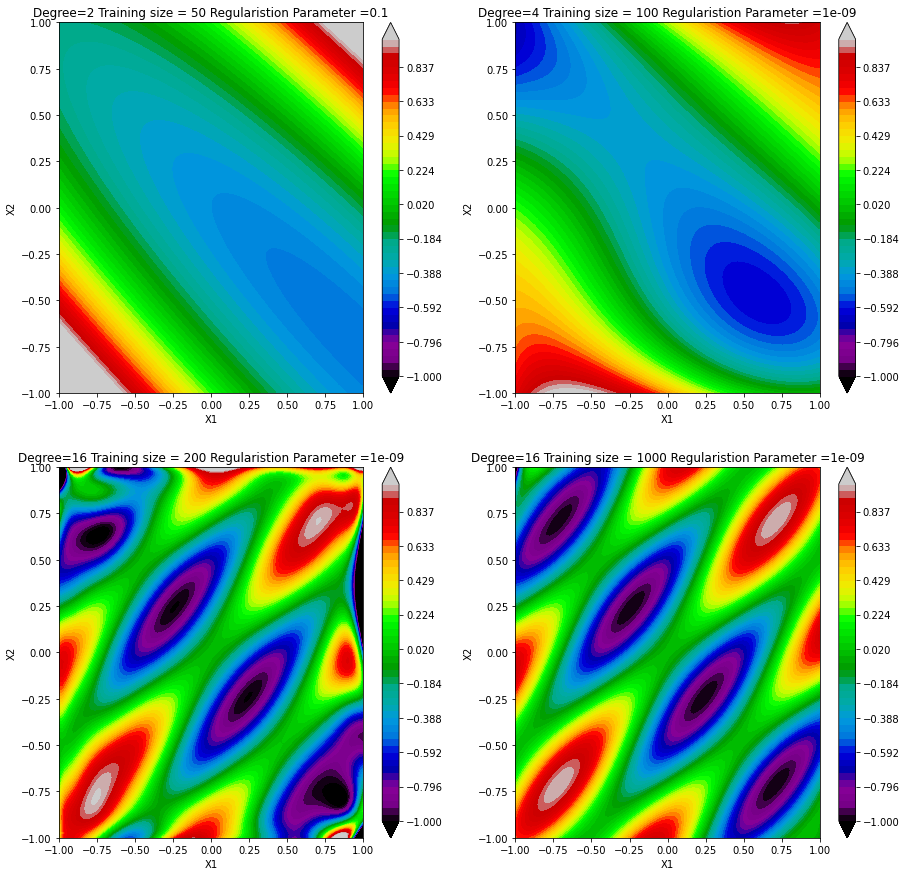

In [48]:
# Cell type : CodeWrite
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    features =  np.ones(len(X_test))

    for i in range(1, degree+1):
        for j in range(0, i+1):
            features = np.vstack((features, (X_test.T)[0]**j * (X_test.T)[1]**(i-j)))

    Y_test_pred = (features.T)@wt_vector

    return Y_test_pred

def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    X1 = X.reshape((100*100,1))
    Y1 = Y.reshape((100*100,1))
    X_test =  np.concatenate((X1, Y1), axis=1)
    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    Z = Z.reshape((100,100))

    plt.contourf(X,Y,Z,levels=np.linspace(-1, 1, 50), cmap = 'nipy_spectral', extend = 'both')
    plt.gca().set_title("Degree="+str(degree)+title)
    plt.gca().set_ylabel("X2")
    plt.gca().set_xlabel("X1")
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi = np.ones(len(X_train))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            phi = np.vstack((phi, (X_train.T)[0]**j * (X_train.T)[1]**(i-j)))

    # W_hat = (phi_transpose*phi + #examples*lamda*I/2)^(-1)*phi_transpose*y
    #       = (term1 + term2)^(-1)*term3
    phi = phi.T
    term1 = (phi.T)@phi
    term2 = np.identity(len(term1))*(reg_param/2)
    term3 = (phi.T)@Y_train

    w = (np.linalg.inv(term1+term2))@term3

    return w


data4 = np.load('Data/dataset4_1.npz') 
X_train, Y_train, X_test, Y_test = data4['arr_0'], data4['arr_1'], data4['arr_2'], data4['arr_3'] 
degrees = [1, 2, 4, 8, 16]
lambdas = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
train_size = [50, 100, 200, 1000]
train_error = np.zeros((len(train_size), len(degrees), len(lambdas)))
test_error = np.zeros((len(train_size), len(degrees), len(lambdas)))
optimal_id = np.zeros((4,2))

for i in range(len(train_size)):
    for j in range(len(degrees)):
        for k in range(len(lambdas)):
            
            x_train = X_train[:train_size[i], :]
            y_train = Y_train[:train_size[i]]

            w_hat = polynomial_regression_ridge_train(x_train, y_train, degrees[j], lambdas[k])
             
            y_train_pred = polynomial_regression_ridge_pred(x_train, w_hat, degrees[j])
            train_error[i, j, k] = np.mean((y_train-y_train_pred)**2)

            y_test_pred = polynomial_regression_ridge_pred(X_test, w_hat, degrees[j])
            test_error[i, j, k] = np.mean((Y_test-y_test_pred)**2)

    optimal_id[i, :] = np.where(test_error[i, :, :] == np.amin(test_error[i, :, :]))
    
plt.figure(figsize=(15,15))
for i in range(len(train_size)):
    x_train = X_train[:train_size[i], :]
    y_train = Y_train[:train_size[i]]
    deg_id = int(optimal_id[i,0])
    lambda_id = int(optimal_id[i,1])
    w = polynomial_regression_ridge_train(x_train, y_train, degrees[deg_id], lambdas[lambda_id])
    plt.subplot(2,2,i+1)
    visualise_polynomial_2d(w, degrees[deg_id]," Training size = "+str(train_size[i])+" Regularistion Parameter ="+str(lambdas[lambda_id]))

** Cell type : TextWrite **
###**Training Size:50**

####**Training Error**

degree/reg_param | 1e-09 | 1e-07 | 1e_05 | 0.001 | 0.1 | 10 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 | 0.250383 | 0.250383 | 0.250383 | 0.250383 | 0.250383 | 0.252403
2 | 0.134112 | 0.134112 | 0.134112 | 0.134112 | 0.134138 | 0.173227
4 | 0.102018 | 0.102018 | 0.102018 | 0.102019 | 0.102972 | 0.156286
8 | 0.000133 | 0.000154 | 0.006372 | 0.037641 | 0.072571 | 0.139192
16 | 0.000000 | 0.000004 | 0.000645 | 0.026117 | 0.062164 | 0.128215

####**Test Error**

degree/reg_param | 1e-09 | 1e-07 | 1e_05 | 0.001 | 0.1 | 10 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 | 0.301267 | 0.301267 | 0.301267 | 0.301265 | 0.301052 | 0.286167
2 | 0.157900 | 0.157900 | 0.157900 | 0.157893 | 0.157268 | 0.187108
4 | 0.157334 | 0.157334 | 0.157333 | 0.157286 | 0.159781 | 0.1780964
8 | 238.184737 | 198.675445 | 32.643307 | 1.182796 | 0.186443 | 0.1793017
16 | 247.661543 | 259.258671 | 82.790944 | 4.688588 | 0.277027 | 0.183897

###**Training Size: 100**

####**Training Error**

degree/reg_param | 1e-09 | 1e-07 | 1e_05 | 0.001 | 0.1 | 10 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 | 0.258091 | 0.258091 | 0.258091 | 0.258091 | 0.258091 | 0.258294
2 | 0.130951 | 0.130951 | 0.130951 | 0.130951 | 0.130955 | 0.146629
4 | 0.113027 | 0.113027 | 0.113027 | 0.113027 | 0.113230 | 0.137496
8 | 0.041588 | 0.041588 | 0.041613 | 0.053138 | 0.087902 | 0.130755
16 | 0.000003 | 0.000273 | 0.005318 | 0.035012 | 0.076891 | 0.124828

####**Test Error**

degree/reg_param | 1e-09 | 1e-07 | 1e_05 | 0.001 | 0.1 | 10 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 | 0.273149| 0.273149 |0.273149 |0.273148 |0.273116 |0.270453
2 | 0.153210| 0.153210 |0.153210 |0.153208 |0.153058 |0.160594
4 | 0.142776 |0.142776 |0.142776 |0.142792 |0.144432 |0.160645
8 | 0.712924 |0.712125 |0.640162 |0.183329 |0.175500 |0.165630
16 | 73.869241 |20.428479 |26.882457 |0.924970 |0.207046 |0.168525


###**Training Size:200**

####**Training Error**

degree/reg_param | 1e-09 | 1e-07 | 1e_05 | 0.001 | 0.1 | 10 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 |0.246535 |0.246535 |0.246535 |0.246535 |0.246535 |0.246565
2 |0.133665 |0.133665 |0.133665 |0.133665 |0.133666 |0.138801
4 |0.113338 |0.113338 |0.113338 |0.113338 |0.113408 |0.136308
8 |0.061737 |0.061737 |0.061738 |0.062632 |0.090512 |0.129464
16 |0.000018 |0.000759 |0.007307 |0.038257 |0.078585 |0.121284

####**Test Error**

degree/reg_param | 1e-09 | 1e-07 | 1e_05 | 0.001 | 0.1 | 10 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 |0.267663 |0.267663 |0.267663 |0.267663 |0.267654 |0.266876
2 |0.145781 |0.145781 |0.145781 |0.145781 |0.145767 |0.150107
4 |0.131171 |0.131171 |0.131171 |0.131168 |0.130923 |0.149624
8 |0.137363 |0.137361 |0.137171 |0.124754 |0.109683 |0.145633
16 |0.065120 |0.098993 |0.179391 |0.081454 |0.110182 |0.140986


###**Training Size:1000**

####**Training Error**

degree/reg_param | 1e-09 | 1e-07 | 1e_05 | 0.001 | 0.1 | 10 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 | 0.240728 |0.240728 |0.240728 |0.240728 |0.240728 |0.240728
2 |0.138824 |0.138824 |0.138824 |0.138824 |0.138824 |0.139071
4 |0.125017 |0.125017 |0.125017 |0.125017 |0.125019 |0.130005
8 |0.076743 |0.076743 |0.076743 |0.076772 |0.089447 |0.123094
16 |0.000011 |0.000308 |0.005204 |0.032856 |0.078540 |0.114783

####**Test Error**

degree/reg_param | 1e-09 | 1e-07 | 1e_05 | 0.001 | 0.1 | 10 | 
:---:| :---:|:---:|:---:|:---:|:---:|:---:|
1 |0.262535 |0.262535 |0.262535 |0.262535 |0.262535 |0.262532
2 |0.142429 |0.142429 |0.142429 |0.142429 |0.142436 |0.143291
4 |0.127080 |0.127080 |0.127080 |0.127080 |0.127160 |0.135680
8 |0.084813 |0.084813 |0.084806 |0.084285 |0.092644 |0.128427
16 |0.000393 |0.000984 |0.014754 |0.048777 |0.084367 |0.119897


###**Observations:**


1.   For λ = 1e-9 and polynomial of degree 16, the MSE on the trainset is always the best. This is due to the fact that a higher degree polynomial with low regularisation will always better fit the training data.
2.   Although the training MSE for polynomials of higher degree is very low when the dataset size is small, the high test MSE indicates overfitting, that is, the model has simply captured all of the noise and has not learned an useful generalisation. Lower degree polynomials with a high enough λ perform better on a smaller dataset, indicating that they generalise better.
3. As degree increases, the training error always decreases.
4. The training error is always generally lesser than the test error for given degree and regularisation parameter.
5. The training error always increases with increase in regularization.
6. With a few exceptions, the test error decreases as the size of the training data increases. 
7. We can fit higher degree polynomials that generalise on the dataset when we have a larger number of data samples.
8. Increasing regularisation reduces test error significantly for small data sets and high degrees.
9. Increasing regularisation increases test error significantly for large data sets and high degree.




** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










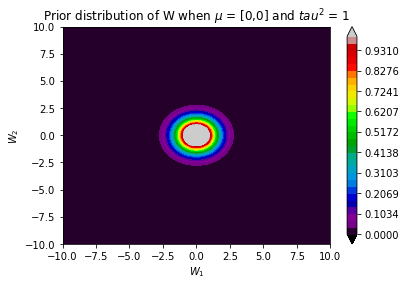

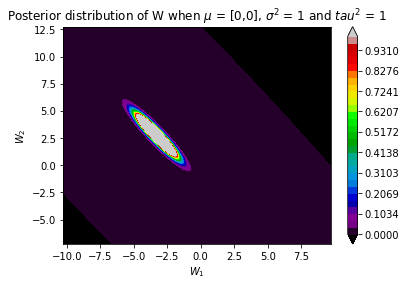

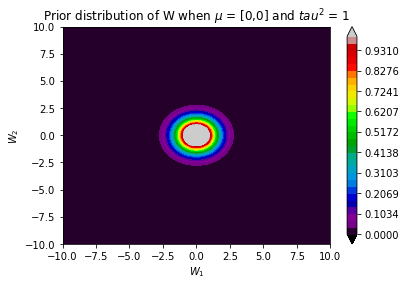

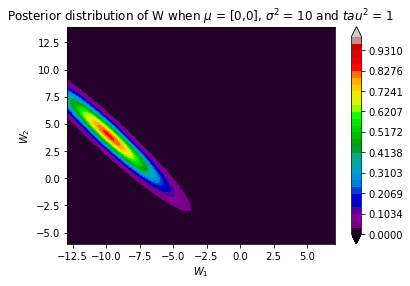

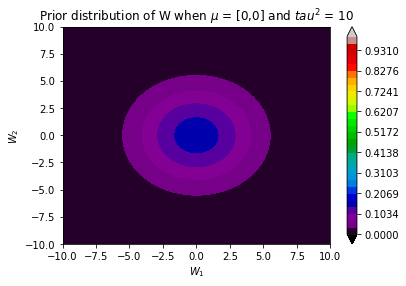

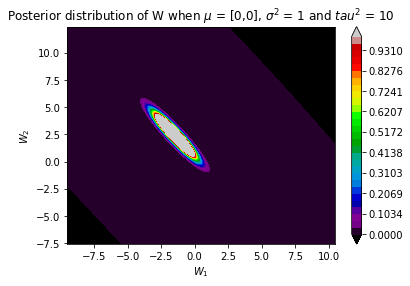

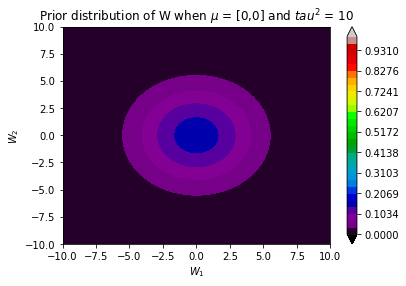

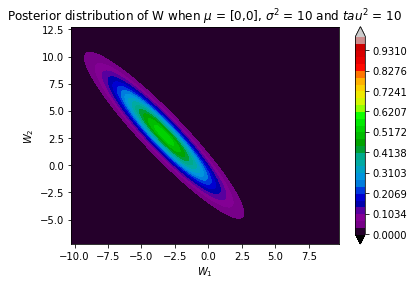

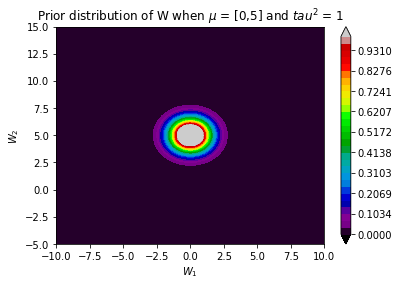

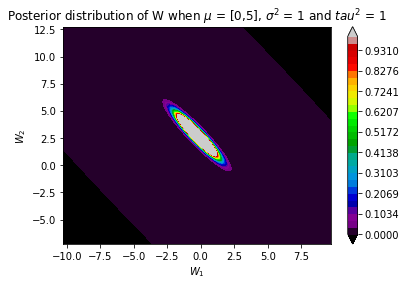

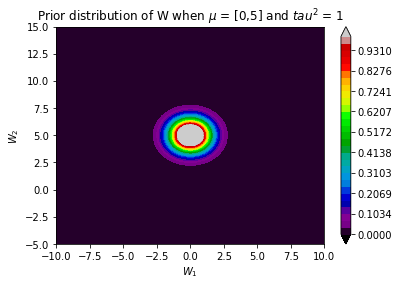

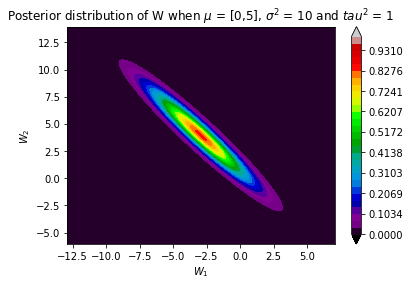

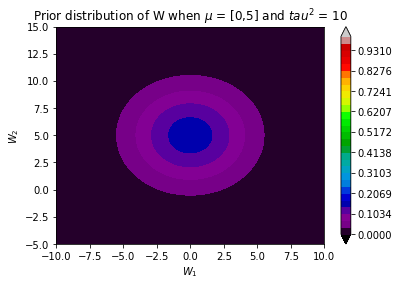

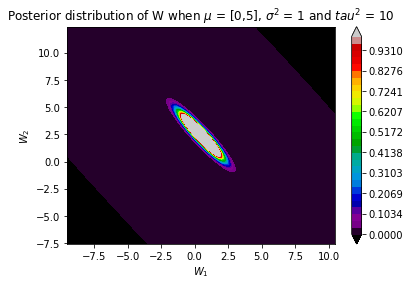

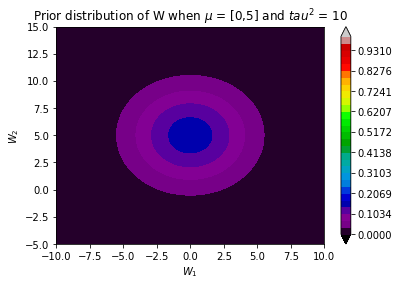

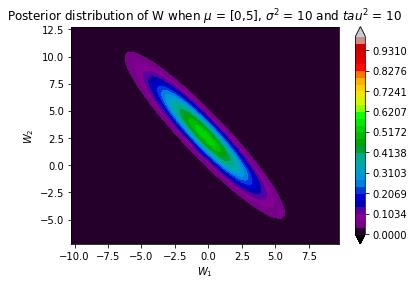

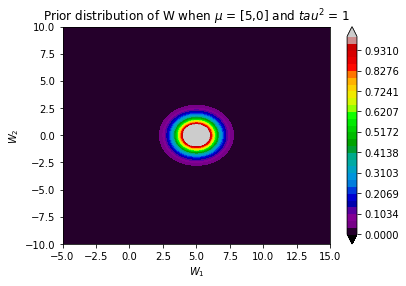

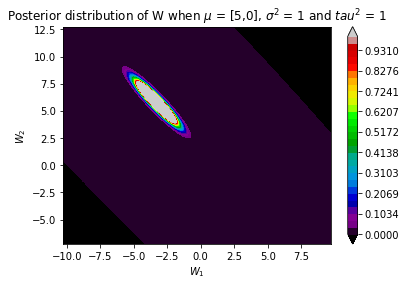

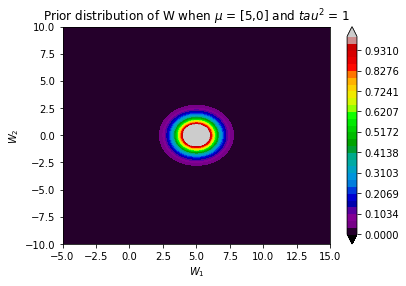

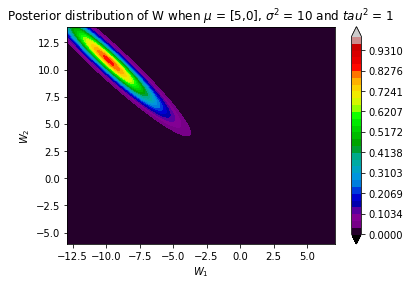

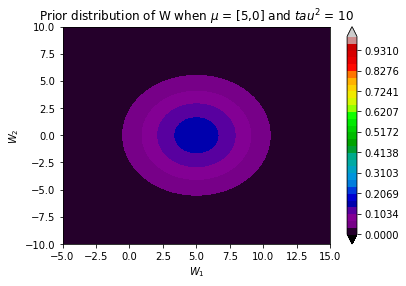

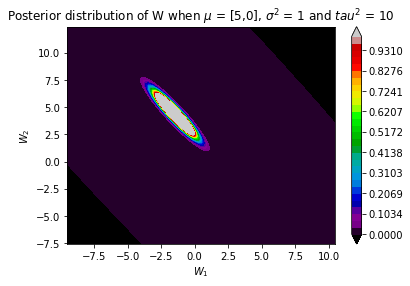

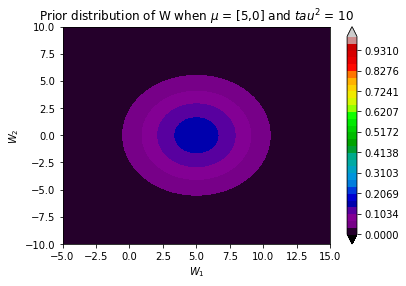

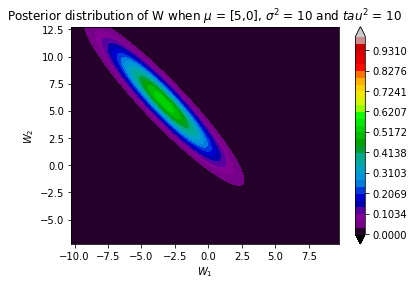

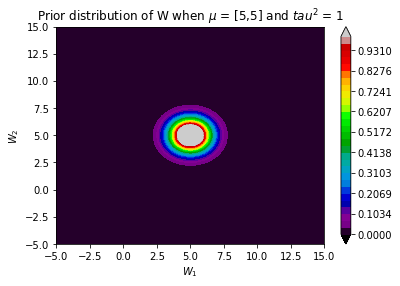

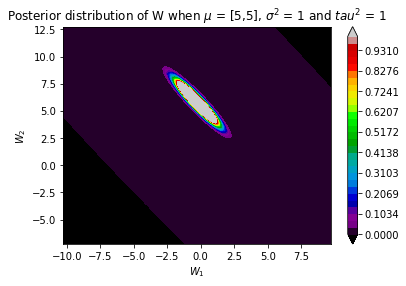

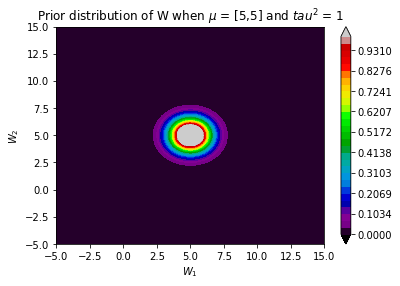

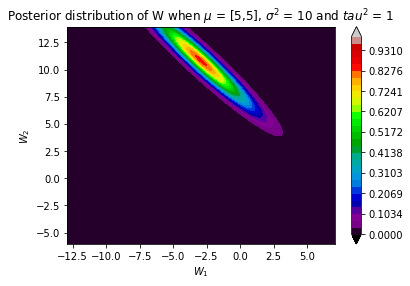

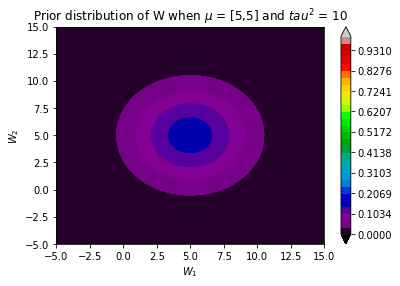

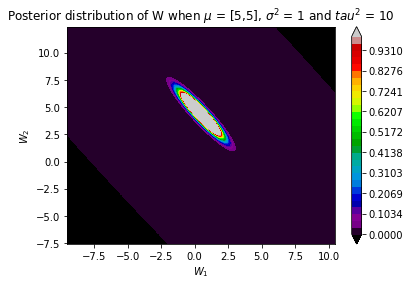

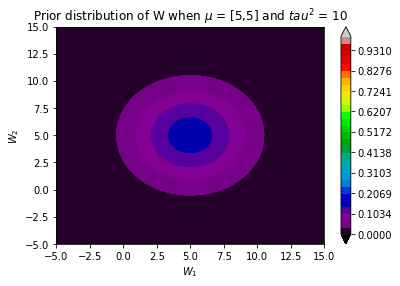

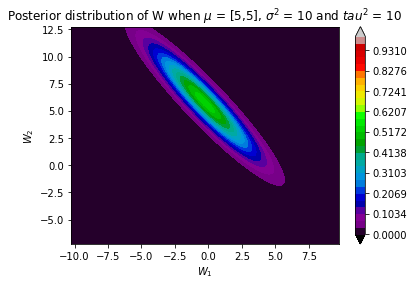

In [31]:
# Cell type : CodeWrite
X_mat = np.array([[1,2],[2,2.1],[0.6,1.5],[1.1,0.9]])
Y_mat = np.array([5.1,6.1,4.2,2.9])

mu1 = np.array([0,5])
mu2 = np.array([0,5])
tau = np.array([1,10])
sigma = np.array([1,10])
Z = np.zeros((1000,1000))

def prior(W1, W2, mu1, mu2, tau):
    """ Returns the prior probability distribution
    Arguments:
    W1, W2: Input spaces for the weights/coefficents
    mu1, mu2: mean of the given prior distribution
    tau: covariance of the distrbution is given as tau*Identity matrix 
    """
    cov_inv = 1/tau*np.eye(2)
    cov_det = np.linalg.det(cov_inv)
    W1_central = W1 - mu1
    W2_central = W2 - mu2
    W_central = np.array([W1_central, W2_central])
    pi = np.pi
    #determinant of the covarince matrix and its inverse are reciprocals
    ans =   np.sqrt(cov_det)*np.exp(-np.matmul(np.matmul(np.transpose(W_central),cov_inv),W_central)/2)/2*pi
    return ans

def evaluate(X, Y, tau, sigma):
    """
    Arguments:
    X: given samples(features) in the dataset
    Y: given labels corresponding to samples in X
    tau: variance in the sample
    sigma: variance in the noise

    returns:
    cov_inv: inverse of the covariance matrix in the posterior
    cov_det: determinant of cov_inv
    mu: mean in the posterior distribituion
    """
    cov_inv = np.matmul(np.transpose(X),X)/sigma+1/tau
    cov_det = np.linalg.det(cov_inv)
    mu = np.transpose(np.matmul(np.matmul(np.transpose(Y),X),np.linalg.inv(cov_inv))/sigma)

    return cov_inv, cov_det, mu


def posterior(W1, W2, cov_inv, cov_det, mu1, mu2, tau, sigma):
    W1_central = W1 - mu1
    W2_central = W2 - mu2
    W_central = np.array([W1_central, W2_central])
    pi = np.pi

    return np.sqrt(cov_det)*np.exp(-np.matmul(np.matmul(np.transpose(W_central),cov_inv), W_central)/2)/2*pi


for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):

                W1 = np.linspace(-10+mu1[i],10+mu1[i],1000)
                W2 = np.linspace(-10+mu2[j],10+mu2[j],1000)
                
                X, Y = np.meshgrid(W1, W2)
                
                for m in range(1000):
                    for n in range(1000):
                        Z[m,n] = prior(W1[m], W2[n], mu1[i], mu2[j], tau[k])
   
                
                plt.subplots(1,1)
                plt.contourf(X,Y,Z,levels=np.linspace(0,1., 30), cmap='nipy_spectral', extend='both')
                plt.title('Prior distribution of W when $\mu$ = [{},{}] and $tau^2$ = {}'.format(mu1[i],mu2[j],tau[k]))
                plt.colorbar()     
                plt.xlabel('$W_1$')
                plt.ylabel('$W_2$')
                plt.show()


                cov_inv, cov_det, mu = evaluate(X_mat, Y_mat, tau[k], sigma[l])

                W1 = np.linspace(-10+mu[0],10+mu[0],1000)
                W2 = np.linspace(-10+mu[1],10+mu[1],1000)
                X, Y = np.meshgrid(W1, W2)

                for p in range(1000):
                    for q in range(1000):
                        Z[p,q] = posterior(W1[p], W2[q], cov_inv, cov_det, mu[i], mu[j], tau[k], sigma[l])
                
                plt.subplots(1,1)
                plt.contourf(X,Y,Z,levels=np.linspace(0,1., 30), cmap='nipy_spectral', extend='both')
                plt.title('Posterior distribution of W when $\mu$ = [{},{}], $\sigma^2$ = {} and $tau^2$ = {}'.format(mu1[i],mu2[j],sigma[l], tau[k]))
                plt.colorbar()     
                plt.xlabel('$W_1$')
                plt.ylabel('$W_2$')
                plt.show()

** Cell type : TextWrite **
###**Observations:**


1.   The posterior probability distribution is also Gaussian.
2.   Whenever $\tau^2$ is greater than $\sigma^2$, he posterior distribution differs significantly from the previous distribution since it is more strongly influenced by the observed data. In such a situation, our confidence in the correctness of the prior distribution is also quite low.
3. Based on the time it took to plot these graphs, it might not be wrong to say that Bayesian Regression is not very computationally effective.